In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
df = pd.read_csv(r"C:\Users\asus\Desktop\Walmart-DataSet\Walmart DataSet.csv")


sales = pd.DataFrame(df.Weekly_Sales.groupby(df.index).sum())
sales.dtypes

Weekly_Sales    float64
dtype: object

In [46]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df.set_index("Date", inplace = True)



# statistical analysis, EDA, outlier analysis, and handle the missing values

In [47]:
df

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-02-05      1    1643690.90             0        42.31       2.572   
2010-02-12      1    1641957.44             1        38.51       2.548   
2010-02-19      1    1611968.17             0        39.93       2.514   
2010-02-26      1    1409727.59             0        46.63       2.561   
2010-03-05      1    1554806.68             0        46.50       2.625   
...           ...           ...           ...          ...         ...   
2012-09-28     45     713173.95             0        64.88       3.997   
2012-10-05     45     733455.07             0        64.89       3.985   
2012-10-12     45     734464.36             0        54.47       4.000   
2012-10-19     45     718125.53             0        56.47       3.969   
2012-10-26     45     760281.43             0        58.85       3.882   

                   CPI  Unemployment  
Date                                  
2010-02-05  211.096358         8.106  
2010-02-12  211.242170         8.106  
2010-02-19  211.289143         8.106  
2010-02-26  211.319643         8.106  
2010-03-05  211.350143         8.106  
...                ...           ...  
2012-09-28  192.013558         8.684  
2012-10-05  192.170412         8.667  
2012-10-12  192.327265         8.667  
2012-10-19  192.330854         8.667  
2012-10-26  192.308899         8.667  

[6435 rows x 7 columns]

# Checking for null and special expression invalid values in dataset

In [48]:
df.isna().sum()

Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [49]:
df.filter(regex="@#$%^&*()_+{}|:<>?-=\;,$", axis=1)

Empty DataFrame
Columns: []
Index: [2010-02-05 00:00:00, 2010-02-12 00:00:00, 2010-02-19 00:00:00, 2010-02-26 00:00:00, 2010-03-05 00:00:00, 2010-03-12 00:00:00, 2010-03-19 00:00:00, 2010-03-26 00:00:00, 2010-04-02 00:00:00, 2010-04-09 00:00:00, 2010-04-16 00:00:00, 2010-04-23 00:00:00, 2010-04-30 00:00:00, 2010-05-07 00:00:00, 2010-05-14 00:00:00, 2010-05-21 00:00:00, 2010-05-28 00:00:00, 2010-06-04 00:00:00, 2010-06-11 00:00:00, 2010-06-18 00:00:00, 2010-06-25 00:00:00, 2010-07-02 00:00:00, 2010-07-09 00:00:00, 2010-07-16 00:00:00, 2010-07-23 00:00:00, 2010-07-30 00:00:00, 2010-08-06 00:00:00, 2010-08-13 00:00:00, 2010-08-20 00:00:00, 2010-08-27 00:00:00, 2010-09-03 00:00:00, 2010-09-10 00:00:00, 2010-09-17 00:00:00, 2010-09-24 00:00:00, 2010-10-01 00:00:00, 2010-10-08 00:00:00, 2010-10-15 00:00:00, 2010-10-22 00:00:00, 2010-10-29 00:00:00, 2010-11-05 00:00:00, 2010-11-12 00:00:00, 2010-11-19 00:00:00, 2010-11-26 00:00:00, 2010-12-03 00:00:00, 2010-12-10 00:00:00, 2010-12-17 00:00:00, 2010-12-24 00:00:00, 2010-12-31 00:00:00, 2011-01-07 00:00:00, 2011-01-14 00:00:00, 2011-01-21 00:00:00, 2011-01-28 00:00:00, 2011-02-04 00:00:00, 2011-02-11 00:00:00, 2011-02-18 00:00:00, 2011-02-25 00:00:00, 2011-03-04 00:00:00, 2011-03-11 00:00:00, 2011-03-18 00:00:00, 2011-03-25 00:00:00, 2011-04-01 00:00:00, 2011-04-08 00:00:00, 2011-04-15 00:00:00, 2011-04-22 00:00:00, 2011-04-29 00:00:00, 2011-05-06 00:00:00, 2011-05-13 00:00:00, 2011-05-20 00:00:00, 2011-05-27 00:00:00, 2011-06-03 00:00:00, 2011-06-10 00:00:00, 2011-06-17 00:00:00, 2011-06-24 00:00:00, 2011-07-01 00:00:00, 2011-07-08 00:00:00, 2011-07-15 00:00:00, 2011-07-22 00:00:00, 2011-07-29 00:00:00, 2011-08-05 00:00:00, 2011-08-12 00:00:00, 2011-08-19 00:00:00, 2011-08-26 00:00:00, 2011-09-02 00:00:00, 2011-09-09 00:00:00, 2011-09-16 00:00:00, 2011-09-23 00:00:00, 2011-09-30 00:00:00, 2011-10-07 00:00:00, 2011-10-14 00:00:00, 2011-10-21 00:00:00, 2011-10-28 00:00:00, 2011-11-04 00:00:00, 2011-11-11 00:00:00, 2011-11-18 00:00:00, 2011-11-25 00:00:00, 2011-12-02 00:00:00, 2011-12-09 00:00:00, 2011-12-16 00:00:00, 2011-12-23 00:00:00, 2011-12-30 00:00:00, ...]

[6435 rows x 0 columns]

# Let's make dataframe for every store


In [50]:
groupby_store = df.groupby("Store")
store_list = []

for i in range(1, 46):
    group_data = groupby_store.get_group(i)
    store_list.append(group_data)

store_list[12]
    


Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-02-05     13    1967220.53             0        31.53       2.666   
2010-02-12     13    2030933.46             1        33.16       2.671   
2010-02-19     13    1970274.64             0        35.70       2.654   
2010-02-26     13    1817850.32             0        29.98       2.667   
2010-03-05     13    1939980.43             0        40.65       2.681   
...           ...           ...           ...          ...         ...   
2012-09-28     13    1927664.11             0        64.80       3.821   
2012-10-05     13    2041918.74             0        61.79       3.815   
2012-10-12     13    1999079.44             0        55.10       3.797   
2012-10-19     13    2018010.15             0        52.06       3.781   
2012-10-26     13    2035189.66             0        46.97       3.755   

                   CPI  Unemployment  
Date                                  
2010-02-05  126.442065         8.316  
2010-02-12  126.496258         8.316  
2010-02-19  126.526286         8.316  
2010-02-26  126.552286         8.316  
2010-03-05  126.578286         8.316  
...                ...           ...  
2012-09-28  131.043000         5.765  
2012-10-05  131.075667         5.621  
2012-10-12  131.108333         5.621  
2012-10-19  131.149968         5.621  
2012-10-26  131.193097         5.621  

[143 rows x 7 columns]

In [51]:
store_list[2]

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-02-05      3     461622.22             0        45.71       2.572   
2010-02-12      3     420728.96             1        47.93       2.548   
2010-02-19      3     421642.19             0        47.07       2.514   
2010-02-26      3     407204.86             0        52.05       2.561   
2010-03-05      3     415202.04             0        53.04       2.625   
...           ...           ...           ...          ...         ...   
2012-09-28      3     389813.02             0        77.46       3.666   
2012-10-05      3     443557.65             0        72.74       3.617   
2012-10-12      3     410804.39             0        70.31       3.601   
2012-10-19      3     424513.08             0        73.44       3.594   
2012-10-26      3     405432.70             0        74.66       3.506   

                   CPI  Unemployment  
Date                                  
2010-02-05  214.424881         7.368  
2010-02-12  214.574792         7.368  
2010-02-19  214.619887         7.368  
2010-02-26  214.647513         7.368  
2010-03-05  214.675139         7.368  
...                ...           ...  
2012-09-28  226.518093         6.334  
2012-10-05  226.721036         6.034  
2012-10-12  226.923979         6.034  
2012-10-19  226.968844         6.034  
2012-10-26  226.987364         6.034  

[143 rows x 7 columns]

In [52]:

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6435 entries, 2010-02-05 to 2012-10-26
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 402.2 KB


*  If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?
* Plotting graph between weekly sales and unemployment rate

In [53]:
store_list[1]["Unemployment"] ,store_list[1]["Weekly_Sales"]

(Date
 2010-02-05    8.324
 2010-02-12    8.324
 2010-02-19    8.324
 2010-02-26    8.324
 2010-03-05    8.324
               ...  
 2012-09-28    6.565
 2012-10-05    6.170
 2012-10-12    6.170
 2012-10-19    6.170
 2012-10-26    6.170
 Name: Unemployment, Length: 143, dtype: float64,
 Date
 2010-02-05    2136989.46
 2010-02-12    2137809.50
 2010-02-19    2124451.54
 2010-02-26    1865097.27
 2010-03-05    1991013.13
                  ...    
 2012-09-28    1746470.56
 2012-10-05    1998321.04
 2012-10-12    1900745.13
 2012-10-19    1847990.41
 2012-10-26    1834458.35
 Name: Weekly_Sales, Length: 143, dtype: float64)

In [54]:


# calculate the correlation coefficient between weekly sales and unemployment rate for each store
correlations = df.groupby('Store')['Weekly_Sales', 'Unemployment'].corr().iloc[0::2,-1]

# sort the stores by the strength of the correlation
correlations = correlations.sort_values(ascending = False)
correlations

C:\Users\asus\AppData\Local\Temp\ipykernel_22152\2031228088.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  correlations = df.groupby('Store')['Weekly_Sales', 'Unemployment'].corr().iloc[0::2,-1]


Store              
36     Weekly_Sales    0.833734
35     Weekly_Sales    0.483865
21     Weekly_Sales    0.218367
14     Weekly_Sales    0.210786
30     Weekly_Sales    0.201862
18     Weekly_Sales    0.139179
28     Weekly_Sales    0.136671
10     Weekly_Sales    0.131908
19     Weekly_Sales    0.101464
33     Weekly_Sales    0.101175
29     Weekly_Sales    0.084682
15     Weekly_Sales    0.078905
2      Weekly_Sales    0.066325
6      Weekly_Sales    0.044251
22     Weekly_Sales    0.039043
34     Weekly_Sales    0.017010
45     Weekly_Sales   -0.004041
25     Weekly_Sales   -0.004958
12     Weekly_Sales   -0.009286
24     Weekly_Sales   -0.012261
27     Weekly_Sales   -0.014275
11     Weekly_Sales   -0.020339
8      Weekly_Sales   -0.052580
31     Weekly_Sales   -0.064738
26     Weekly_Sales   -0.066899
16     Weekly_Sales   -0.070864
23     Weekly_Sales   -0.077169
20     Weekly_Sales   -0.095341
1      Weekly_Sales   -0.097955
32     Weekly_Sales   -0.099455
40     Weekly_Sales 

Store which are suffering most are 36, 35, 21, 14, 30, 18, 28, 19, 33
       
   
       
       
       
       
       
       
       

In [55]:
for i, store in enumerate(store_list):

    unemployment = store.groupby("Unemployment")["Weekly_Sales"].mean()
    # create a bar plot of mean weekly sales by unemployment rate
    unemployment.plot(kind="bar", figsize=(10, 5))
    plt.xlabel("Unemployment")
    plt.ylabel("Weekly Sales")
    plt.title("Store {}".format(i+1))

    plt.clf()


<Figure size 1000x500 with 0 Axes>

In [56]:
store_list[0].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 143 entries, 2010-02-05 to 2012-10-26
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         143 non-null    int64  
 1   Weekly_Sales  143 non-null    float64
 2   Holiday_Flag  143 non-null    int64  
 3   Temperature   143 non-null    float64
 4   Fuel_Price    143 non-null    float64
 5   CPI           143 non-null    float64
 6   Unemployment  143 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 8.9 KB


C:\Users\asus\AppData\Local\Temp\ipykernel_22152\3729223296.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(10, 5), )


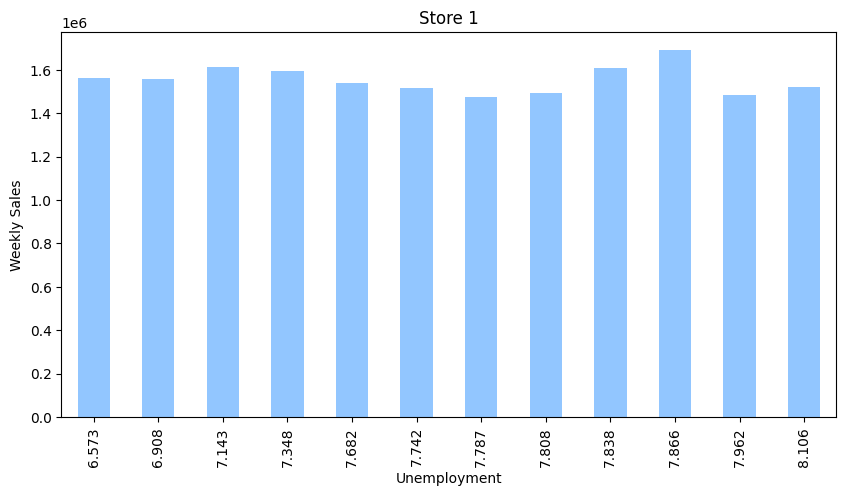

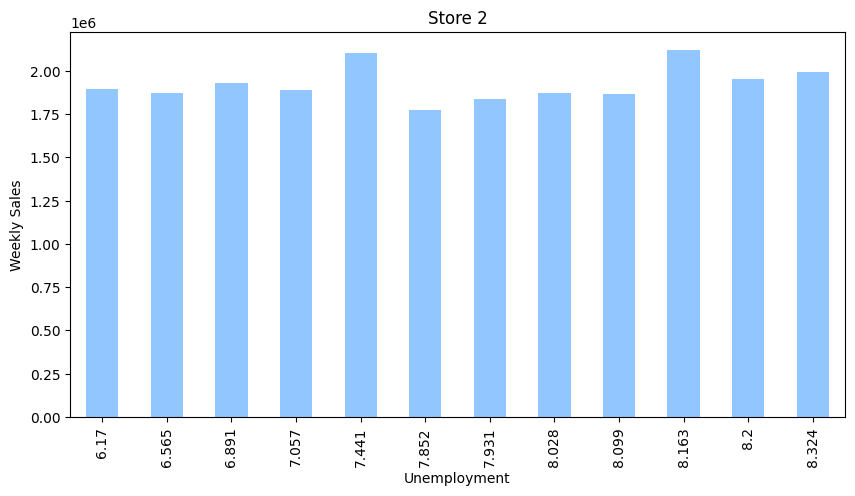

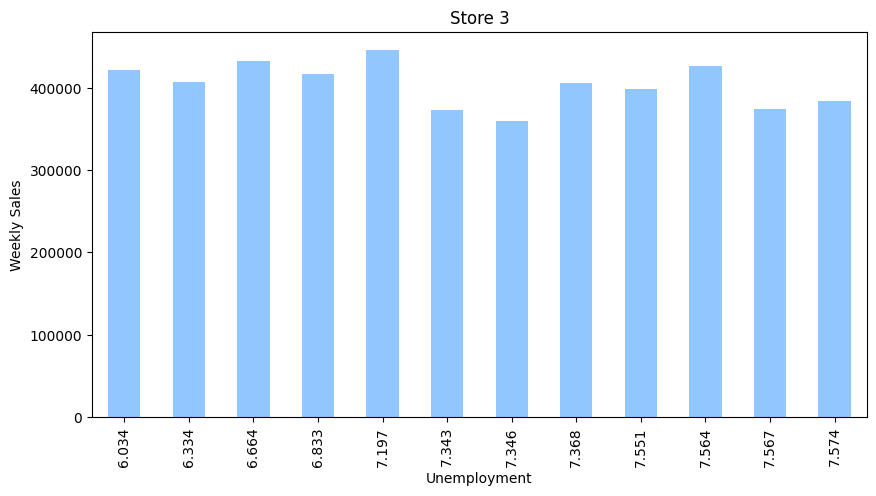

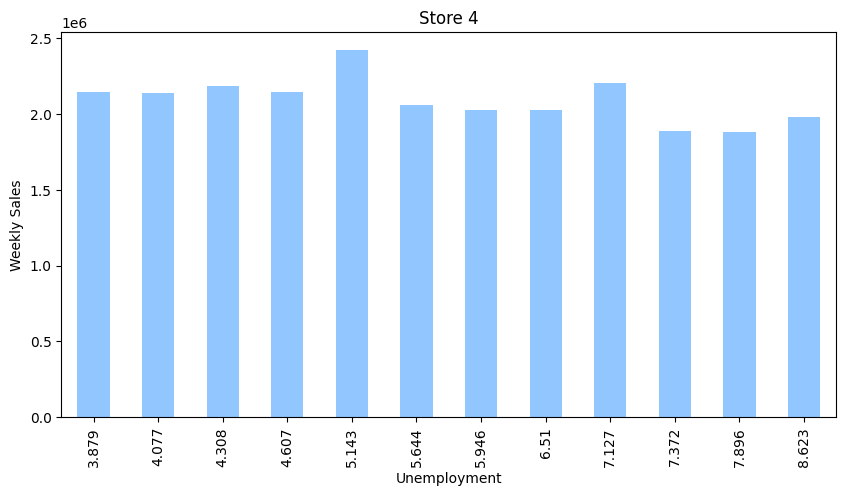

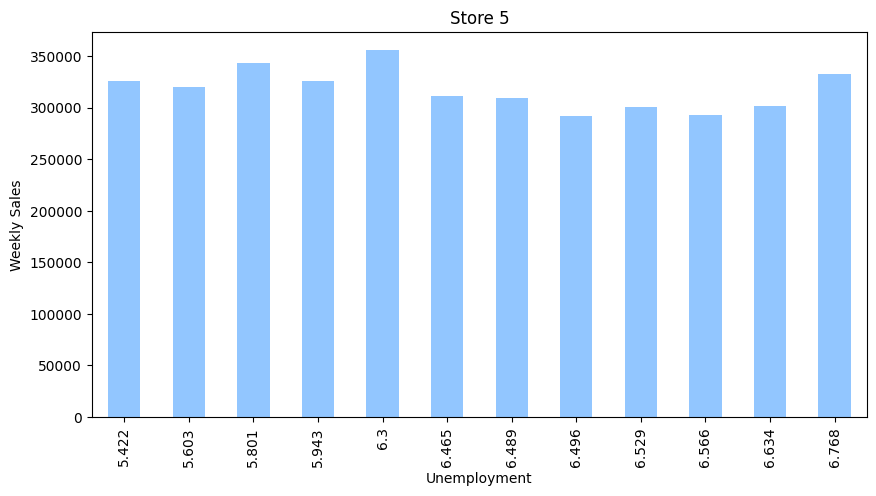

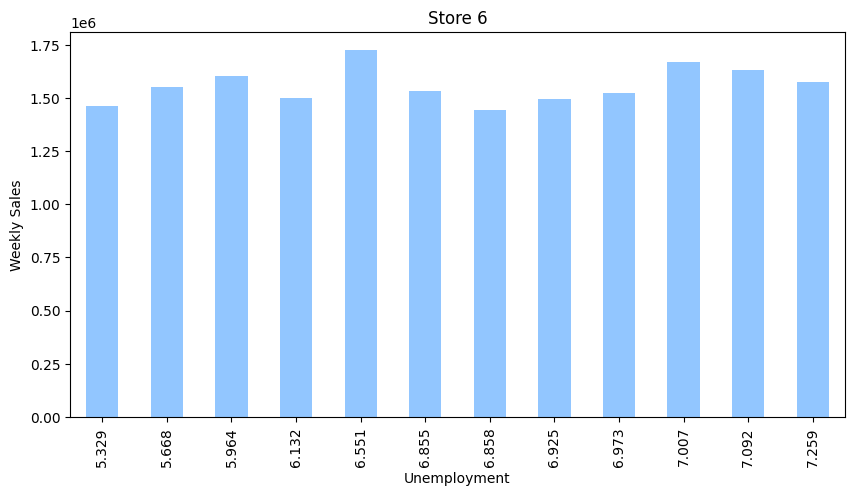

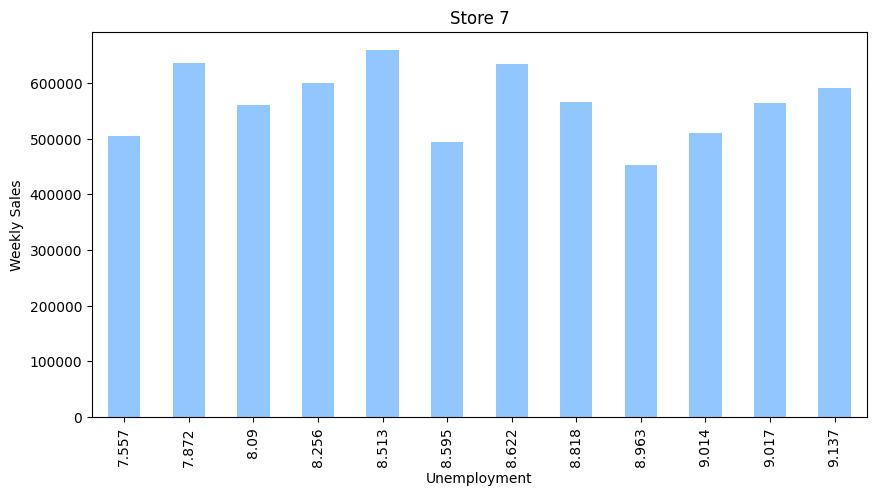

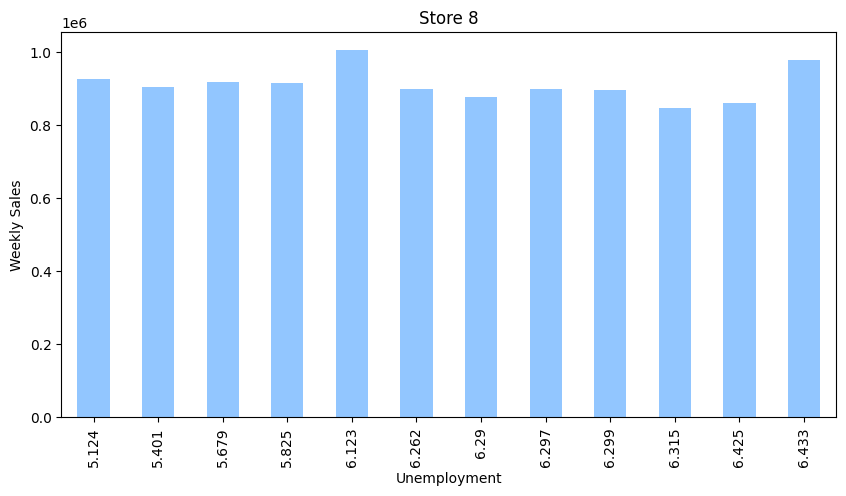

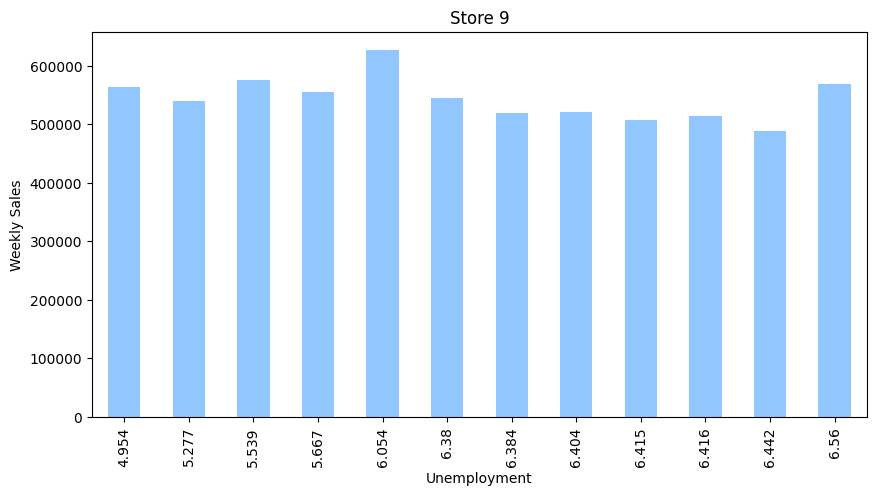

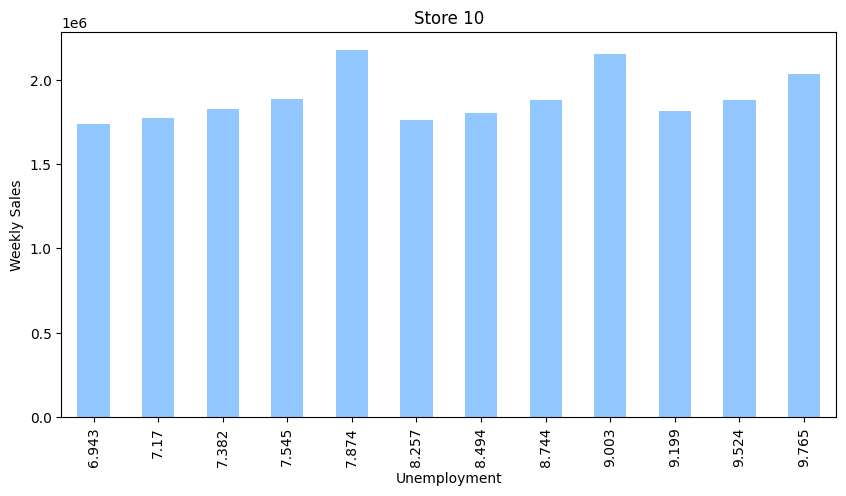

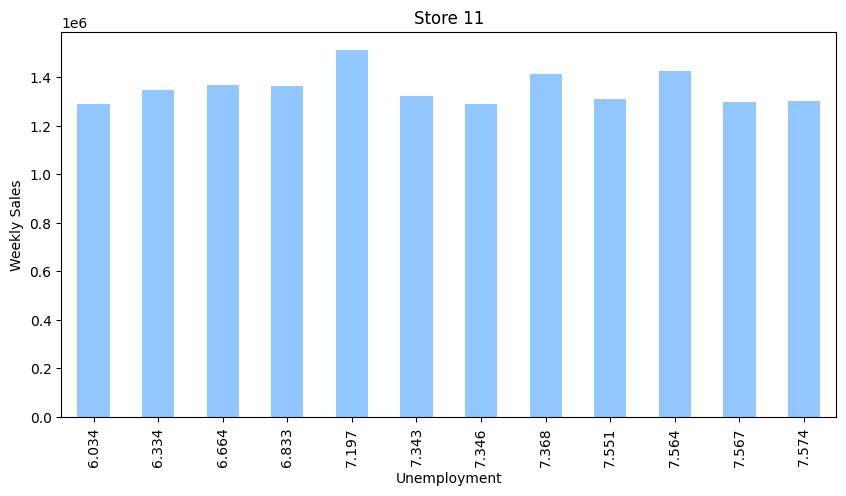

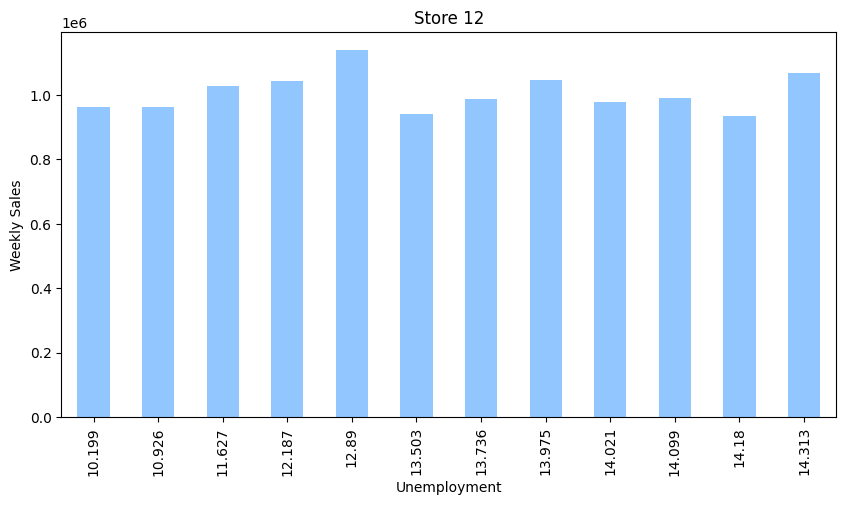

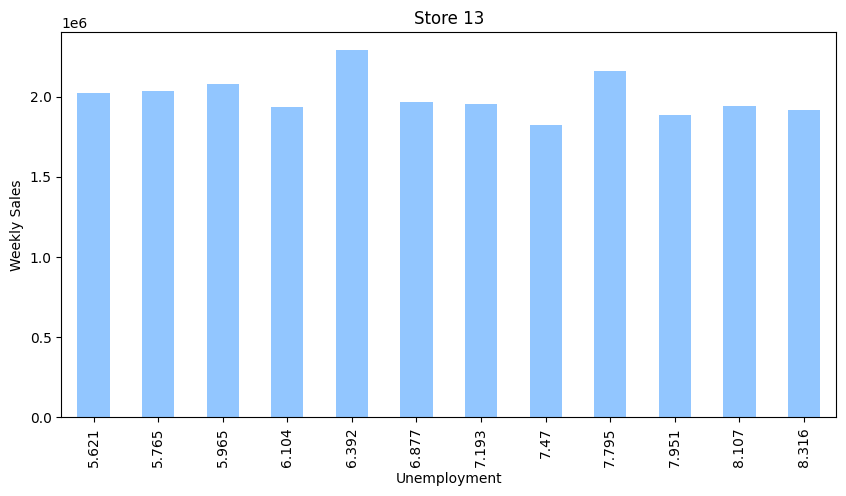

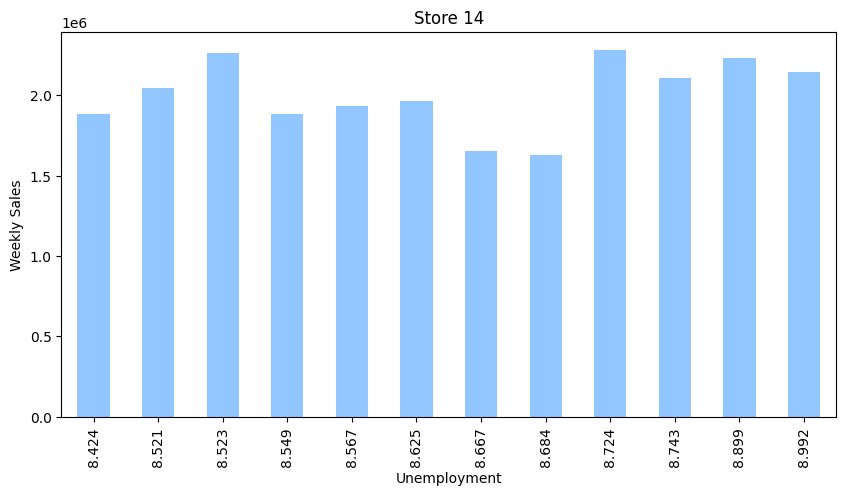

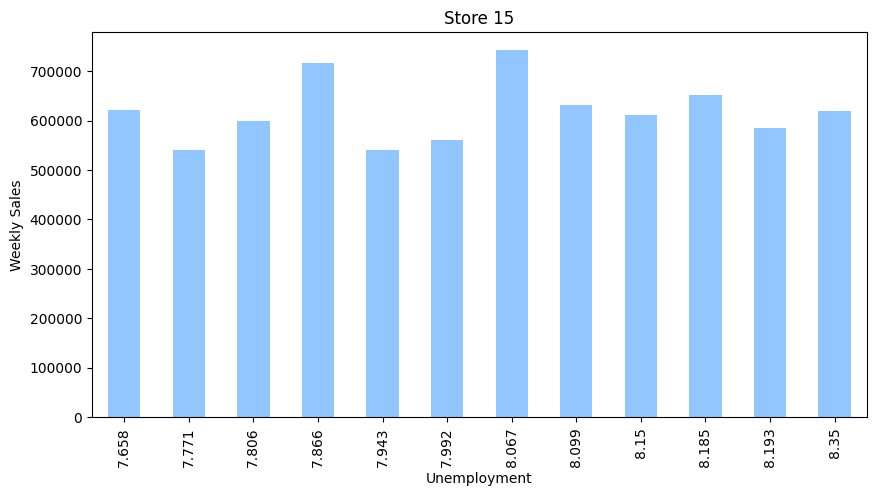

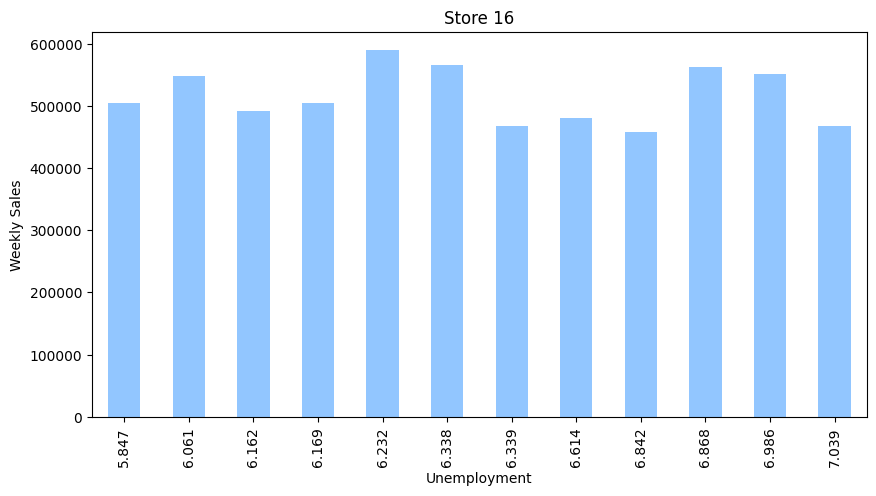

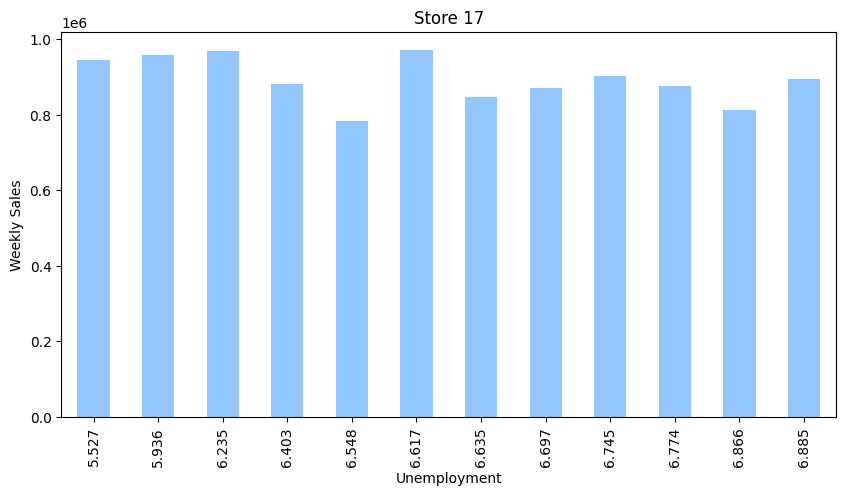

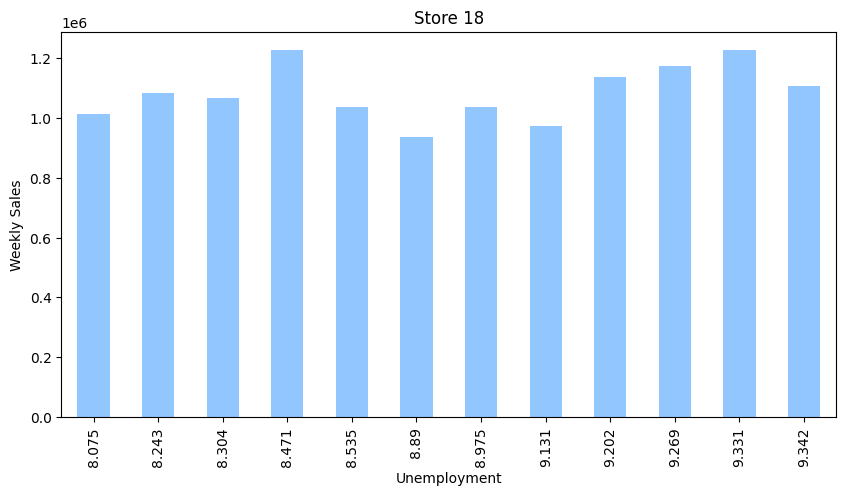

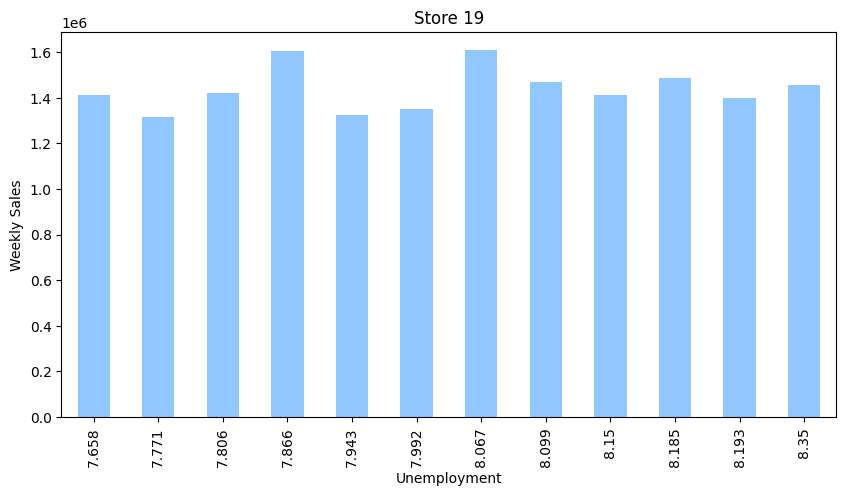

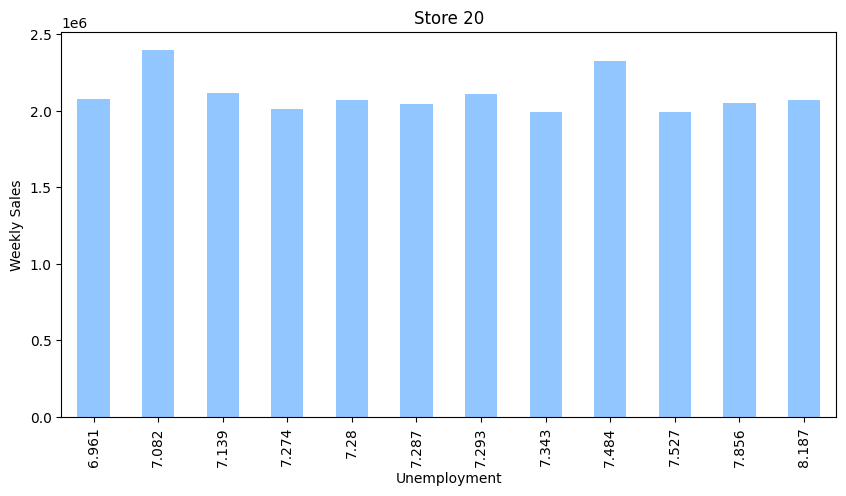

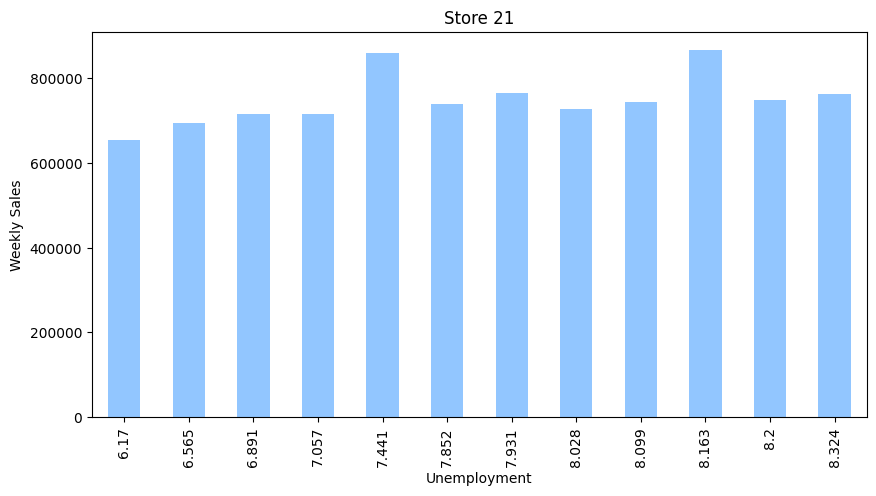

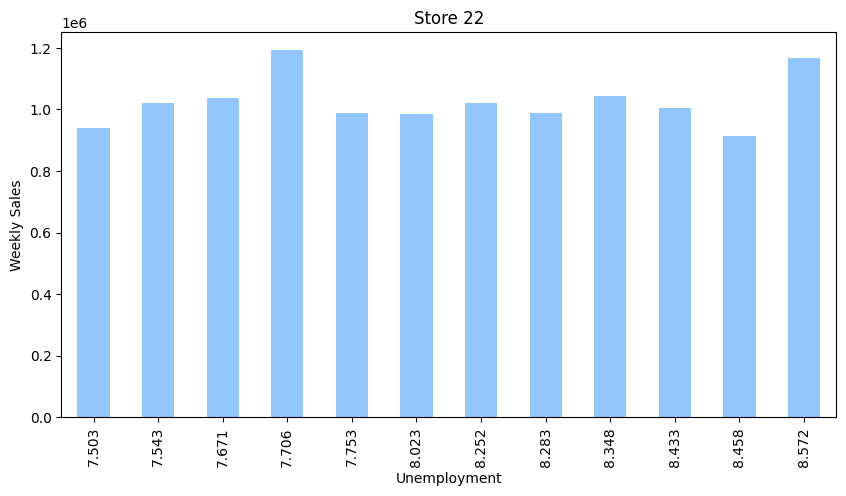

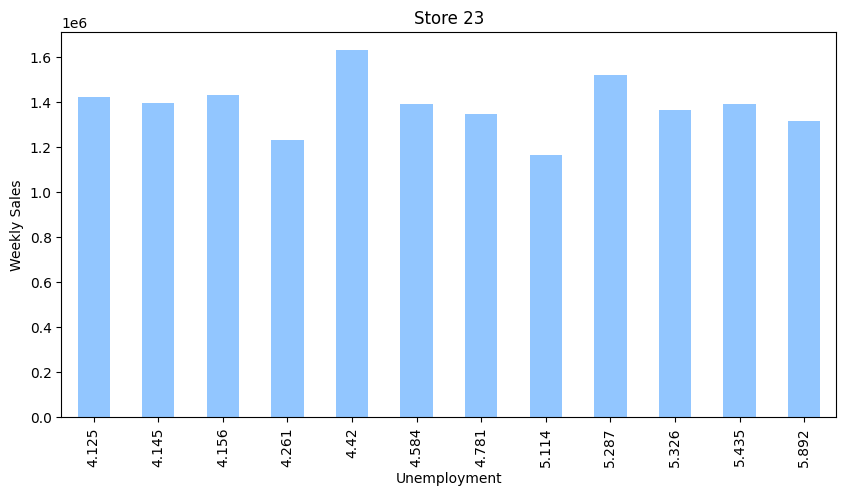

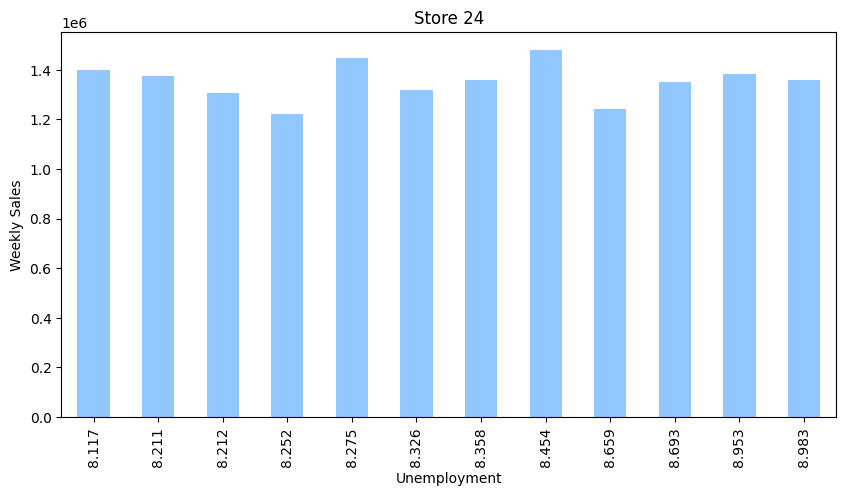

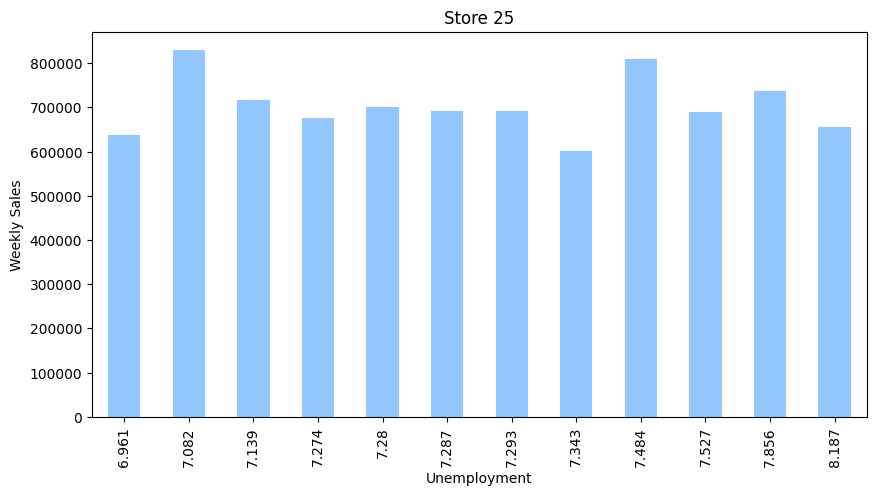

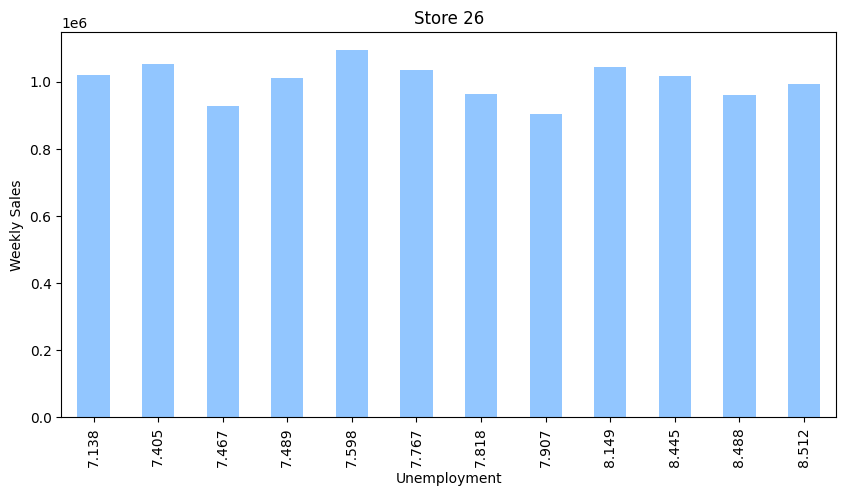

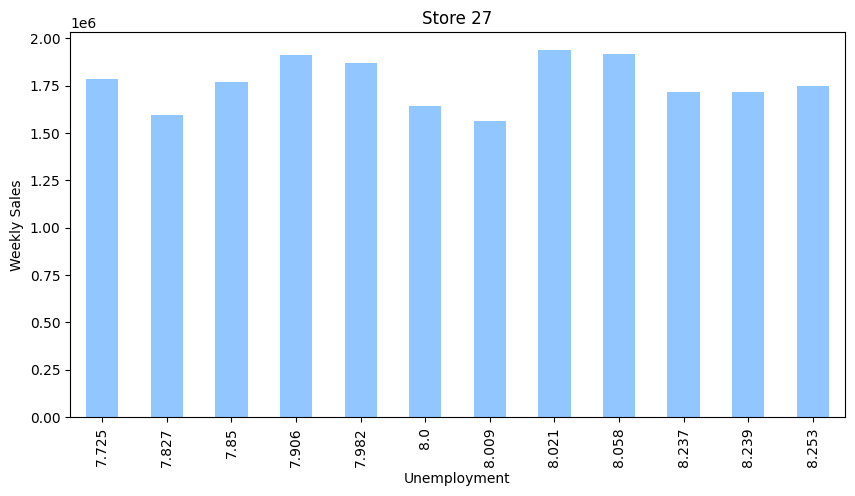

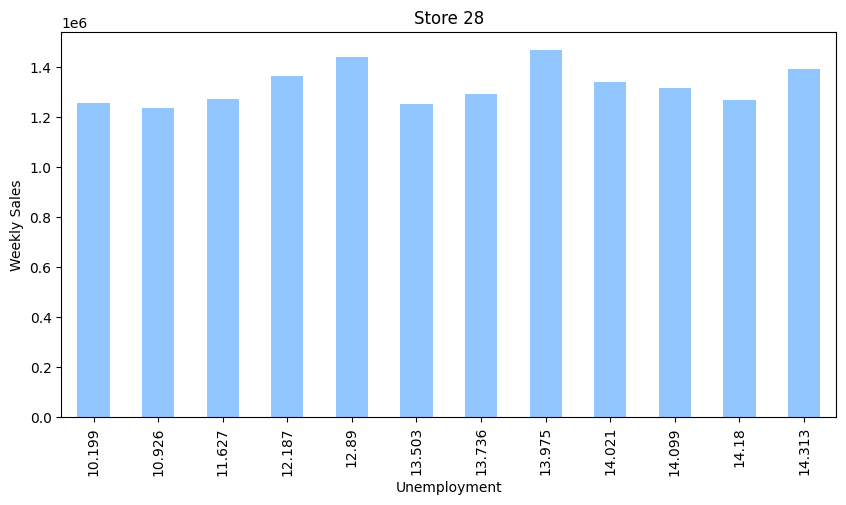

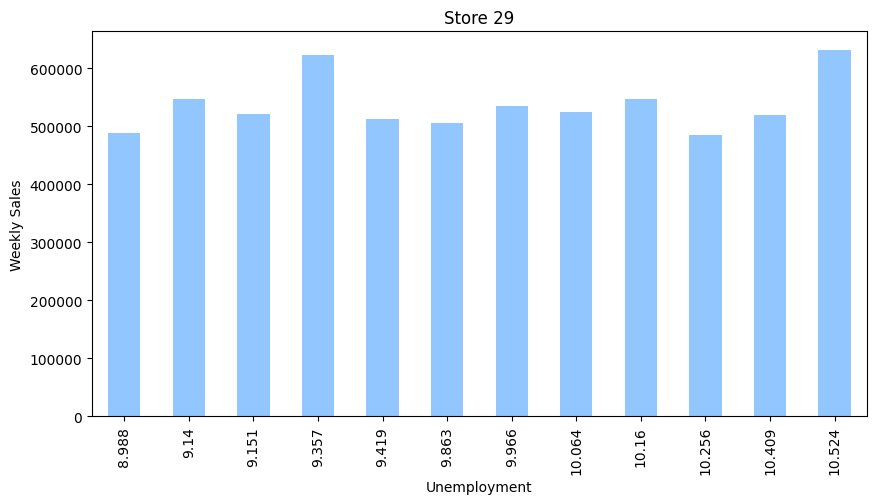

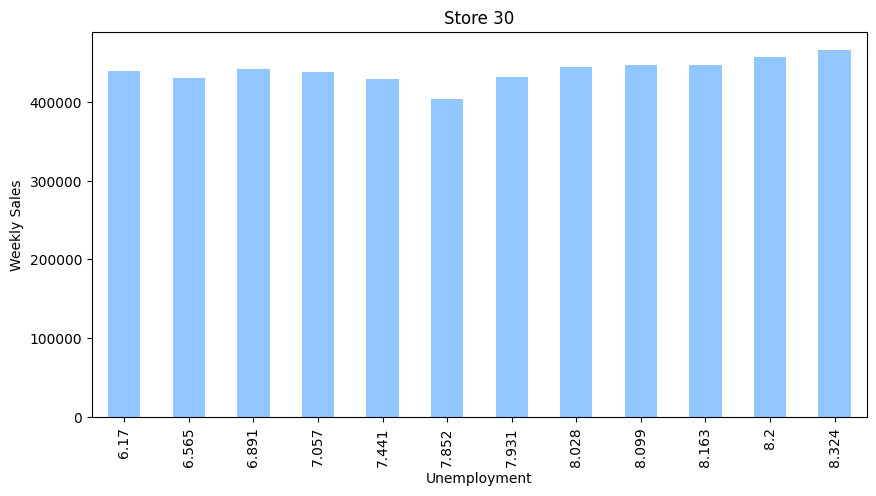

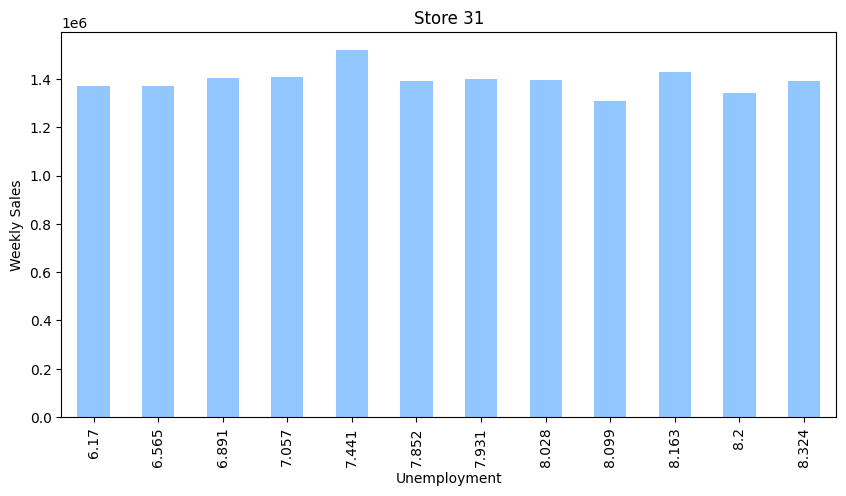

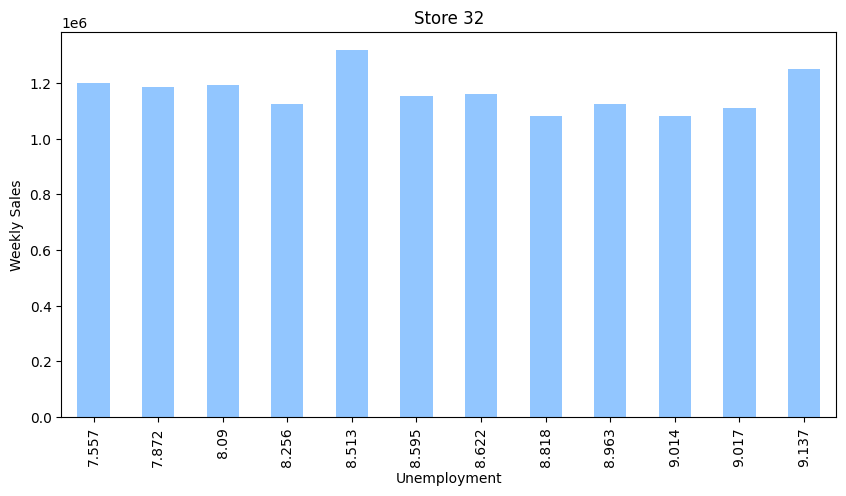

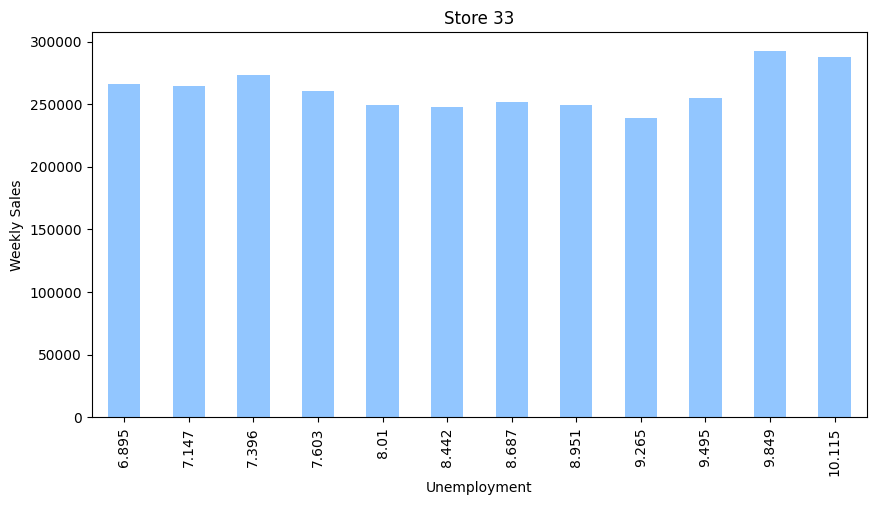

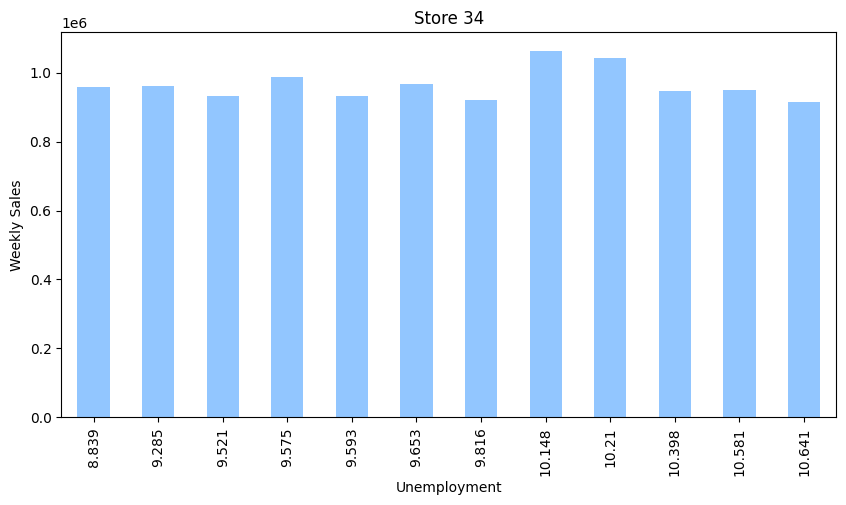

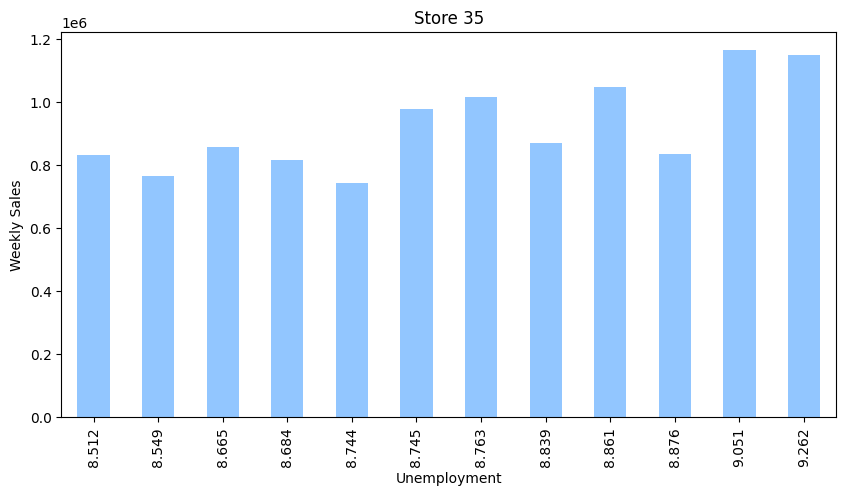

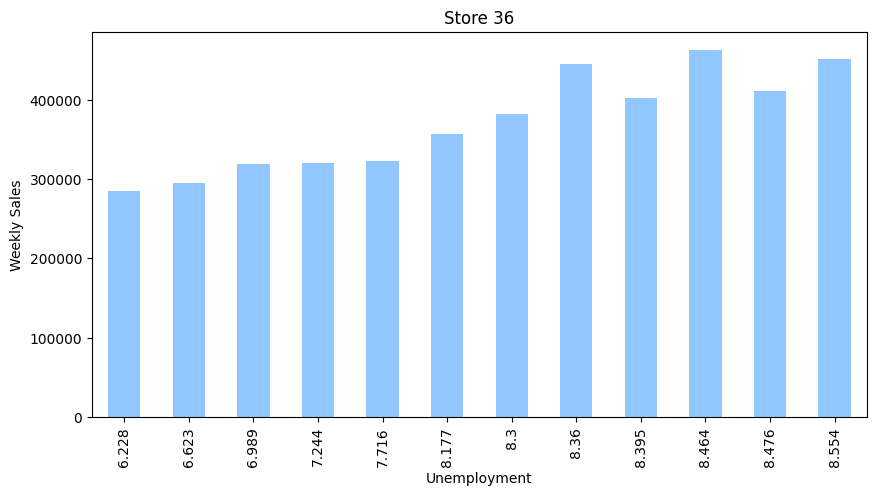

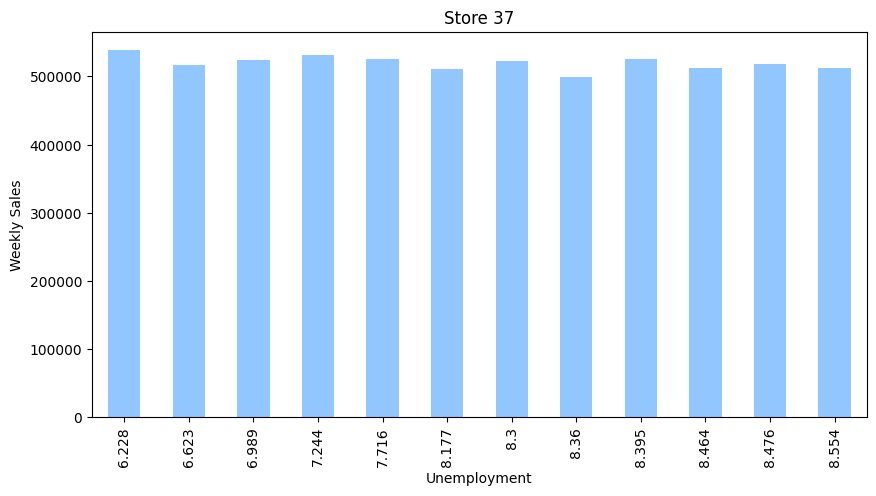

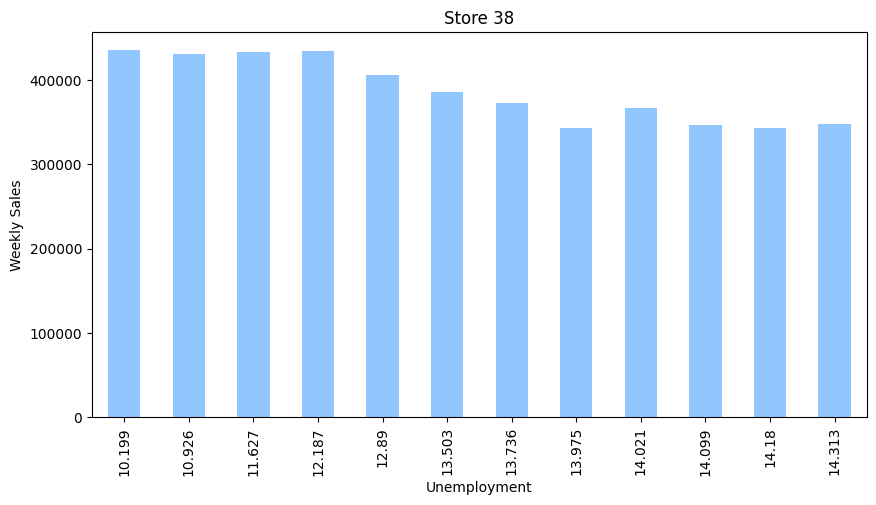

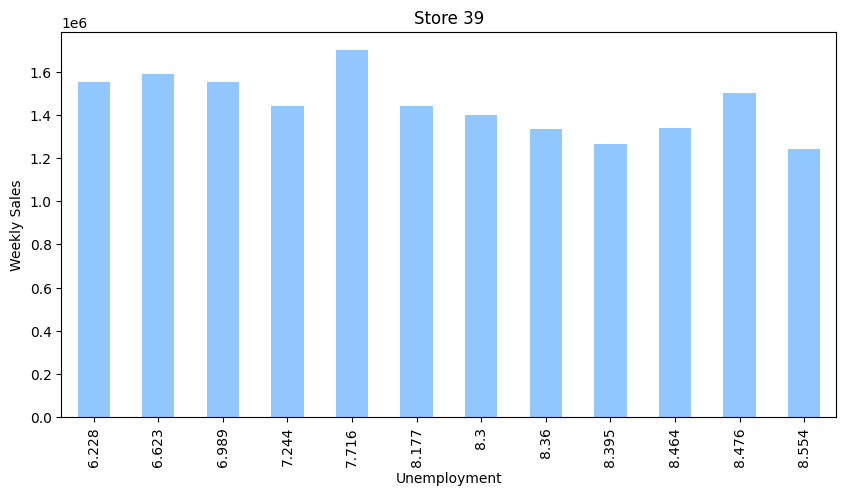

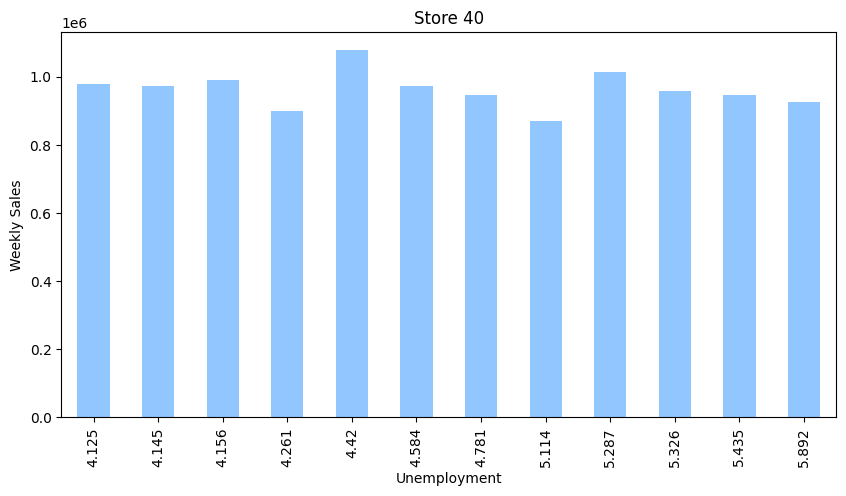

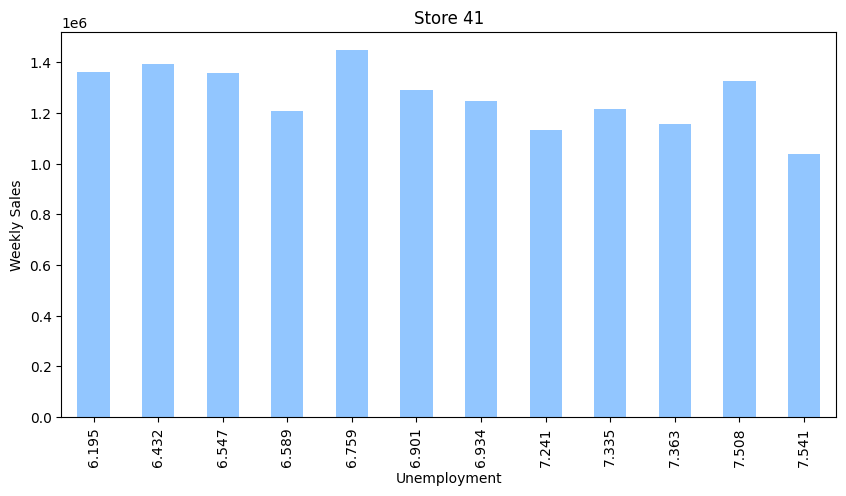

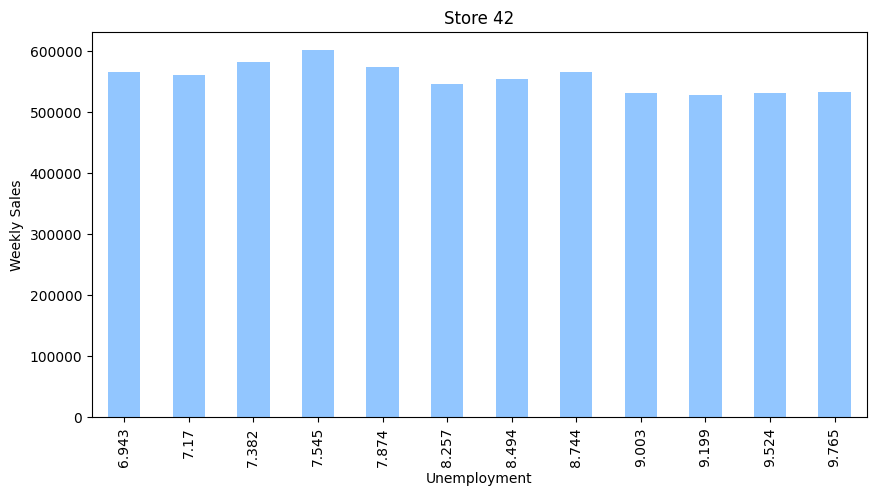

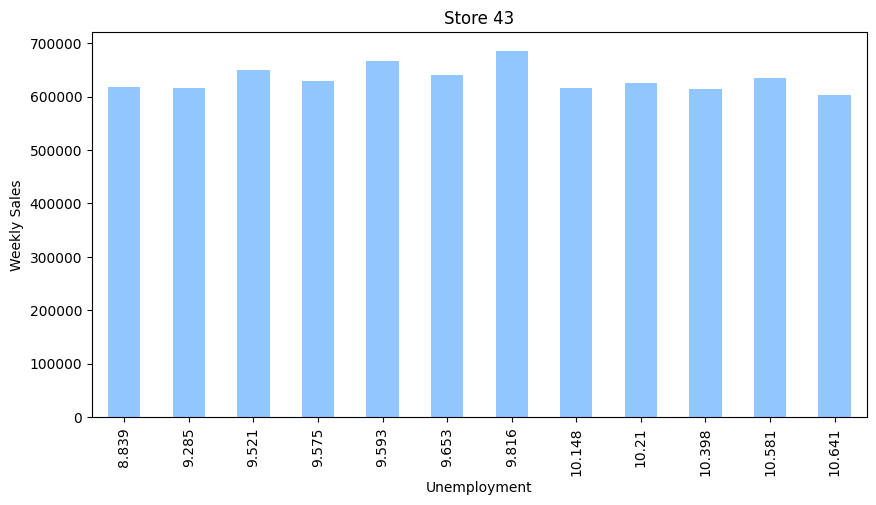

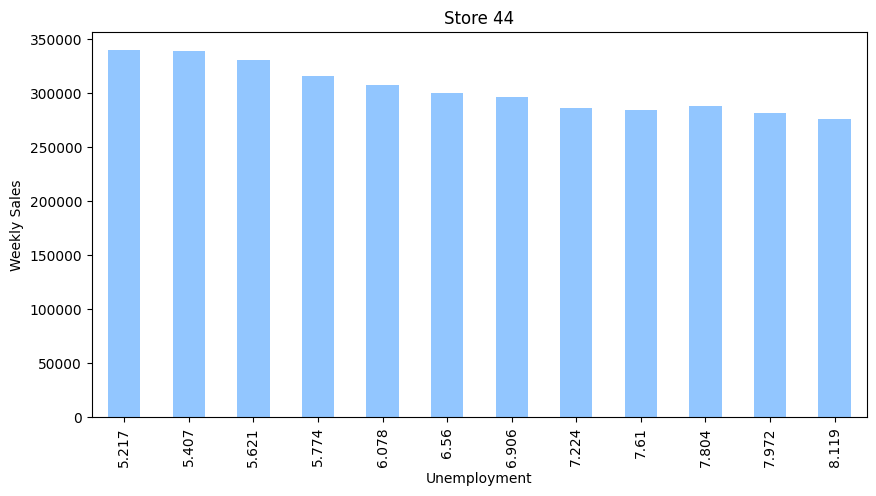

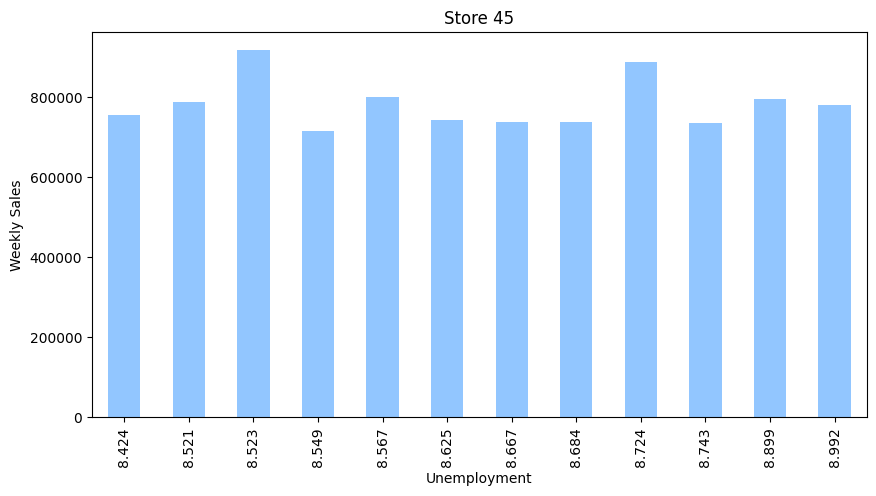

In [57]:
for i, store in enumerate(store_list):
    # Compute the mean weekly sales for each unemployment rate
    unemployment = store.groupby("Unemployment")["Weekly_Sales"].mean()
    # Create a new figure and axis for each store
    fig, ax = plt.subplots(figsize=(10, 5), )

    unemployment.plot(kind="bar")
    plt.xlabel("Unemployment")
    plt.ylabel("Weekly Sales")
    plt.title("Store {}".format(i+1))




In [58]:
df

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-02-05      1    1643690.90             0        42.31       2.572   
2010-02-12      1    1641957.44             1        38.51       2.548   
2010-02-19      1    1611968.17             0        39.93       2.514   
2010-02-26      1    1409727.59             0        46.63       2.561   
2010-03-05      1    1554806.68             0        46.50       2.625   
...           ...           ...           ...          ...         ...   
2012-09-28     45     713173.95             0        64.88       3.997   
2012-10-05     45     733455.07             0        64.89       3.985   
2012-10-12     45     734464.36             0        54.47       4.000   
2012-10-19     45     718125.53             0        56.47       3.969   
2012-10-26     45     760281.43             0        58.85       3.882   

                   CPI  Unemployment  
Date                                  
2010-02-05  211.096358         8.106  
2010-02-12  211.242170         8.106  
2010-02-19  211.289143         8.106  
2010-02-26  211.319643         8.106  
2010-03-05  211.350143         8.106  
...                ...           ...  
2012-09-28  192.013558         8.684  
2012-10-05  192.170412         8.667  
2012-10-12  192.327265         8.667  
2012-10-19  192.330854         8.667  
2012-10-26  192.308899         8.667  

[6435 rows x 7 columns]

# * If the weekly sales show a seasonal trend, when and what could be the reason?
## Ans = Holidays: Certain holidays such as Christmas, Thanksgiving, and Halloween\
## Weather: The weather can also play a significant role in weekly sales.
## The start and end of the school year can impact weekly sales.

<Figure size 640x480 with 0 Axes>

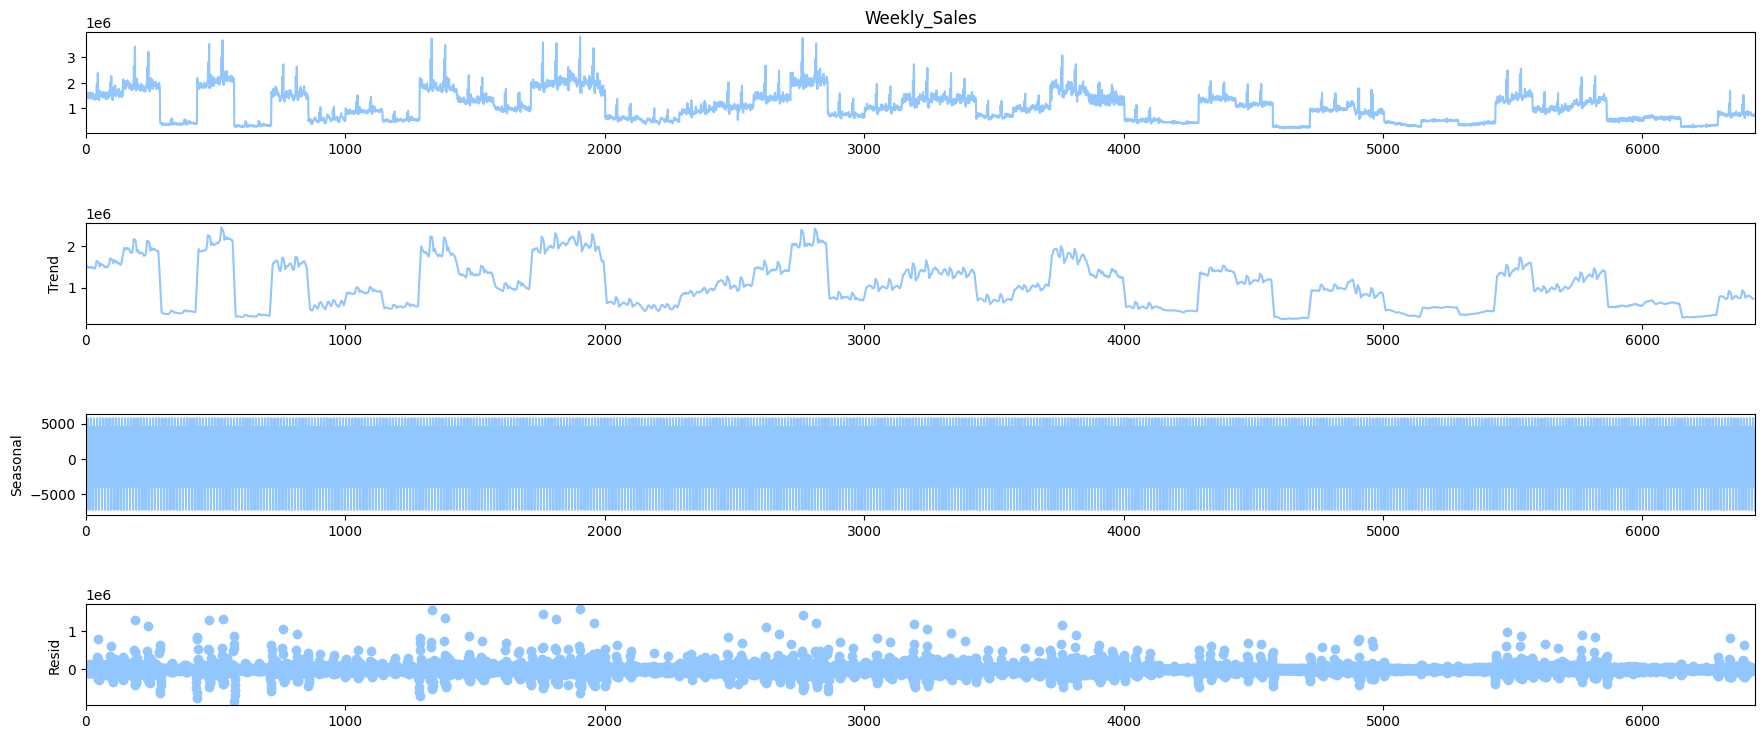

In [59]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(sales.Weekly_Sales, period = 12)
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(20, 8)
plt.show()

In [60]:
sales

Weekly_Sales
0       1643690.90
1       1641957.44
2       1611968.17
3       1409727.59
4       1554806.68
...            ...
6430     713173.95
6431     733455.07
6432     734464.36
6433     718125.53
6434     760281.43

[6435 rows x 1 columns]

# c. Does temperature affect the weekly sales in any manner?
## Ans: Yes It does. As it can be seen from scatter plot the weekly sales as decreased in store 1, store 3, store 12 and store 22.

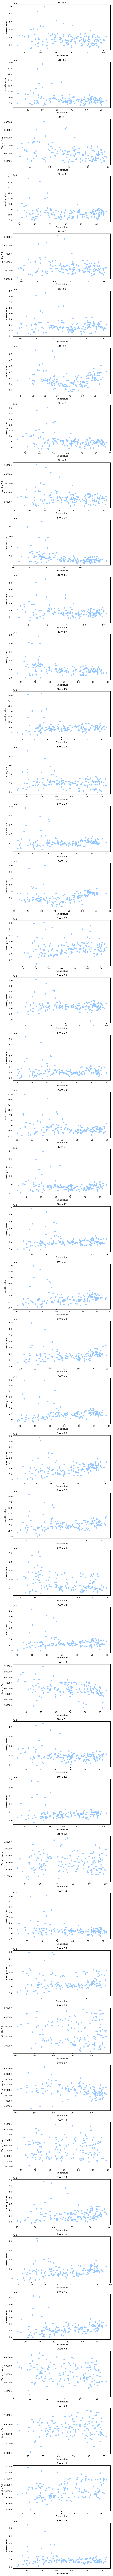

In [61]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(len(store_list), 1, figsize=(8, 4*len(store_list)))

for i in range(len(store_list)):
    df = store_list[i][['Weekly_Sales', 'Temperature']]
    
    axs[i].scatter(df['Temperature'], df['Weekly_Sales'])
    
    axs[i].set_title(f"Store {i+1}")
    axs[i].set_xlabel('Temperature')
    axs[i].set_ylabel('Weekly Sales')

plt.tight_layout()
plt.show()


# d. How is the Consumer Price index affecting the weekly sales of various stores?
## Ans : 

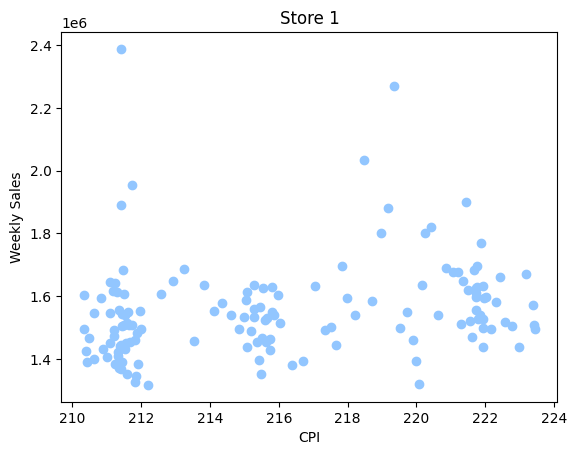

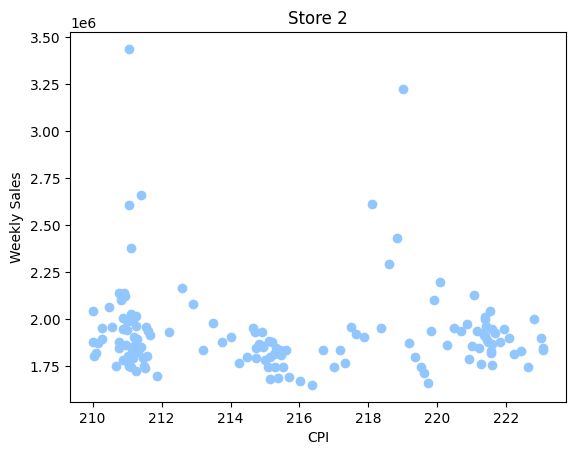

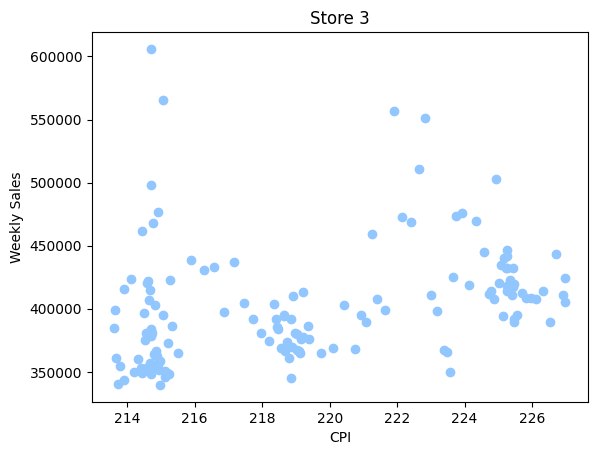

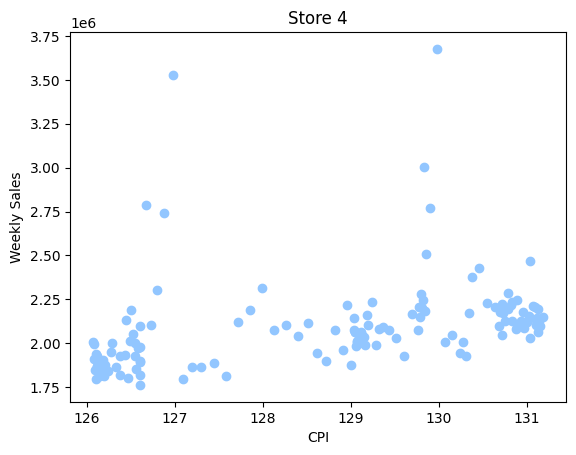

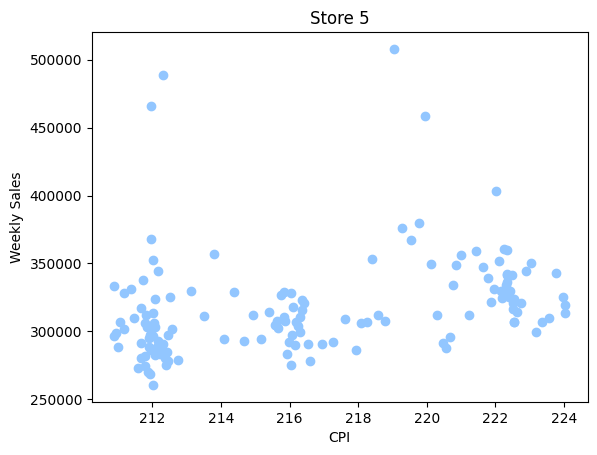

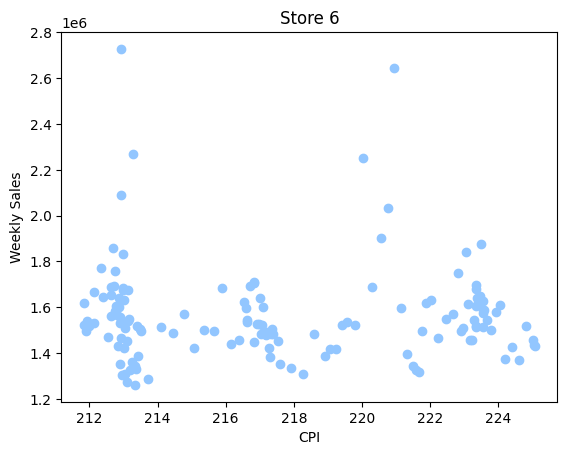

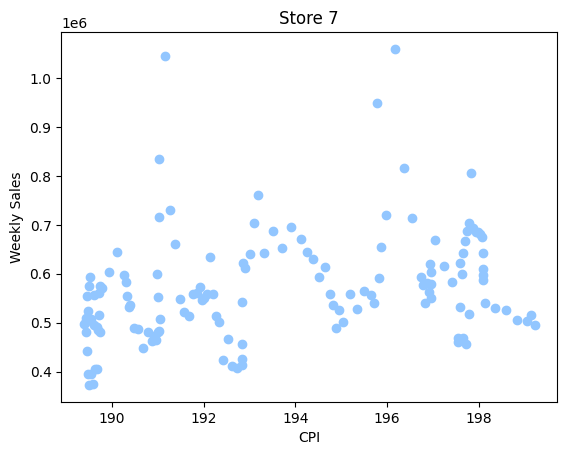

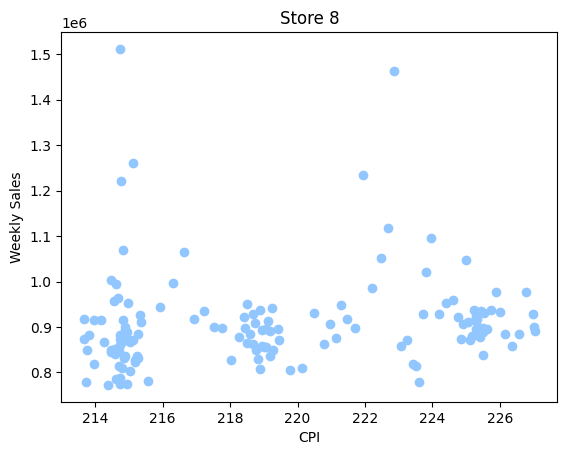

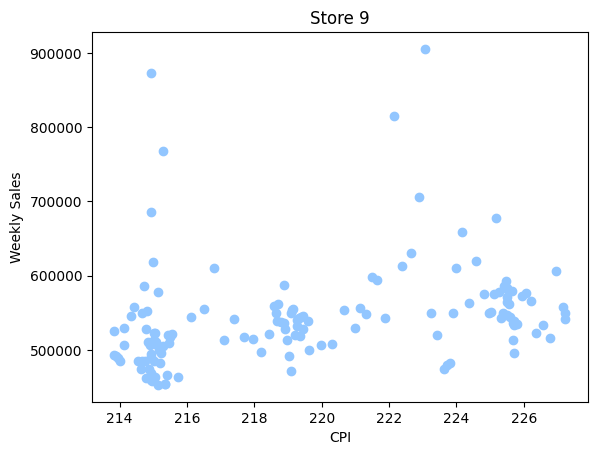

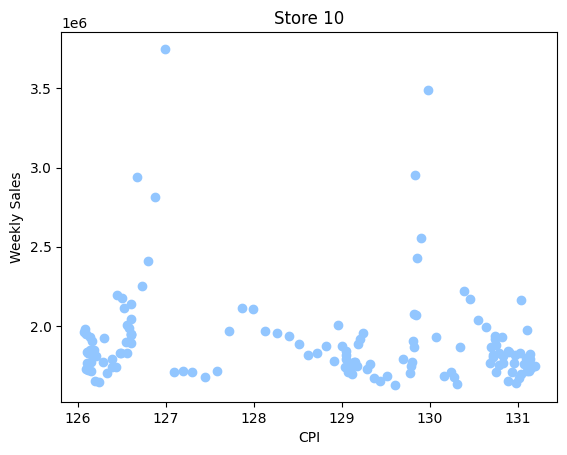

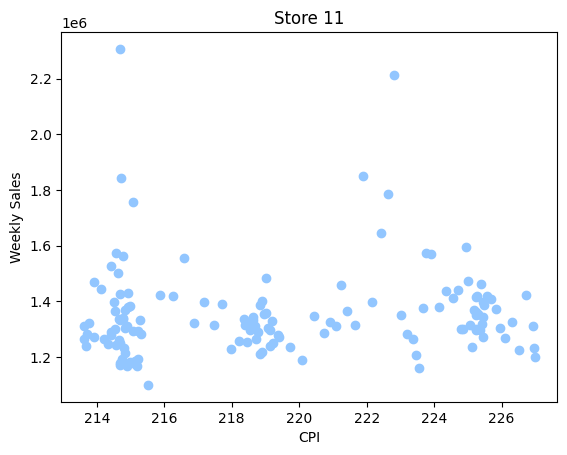

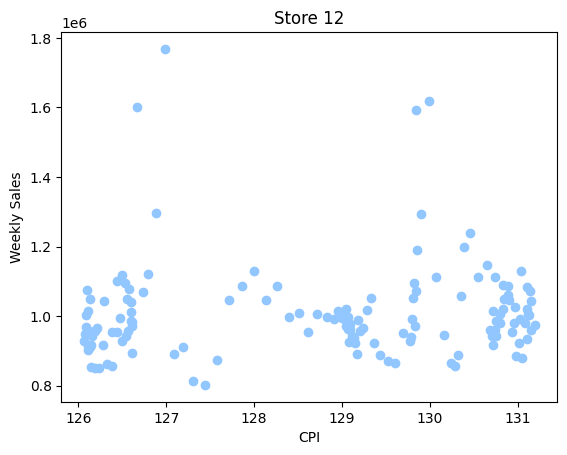

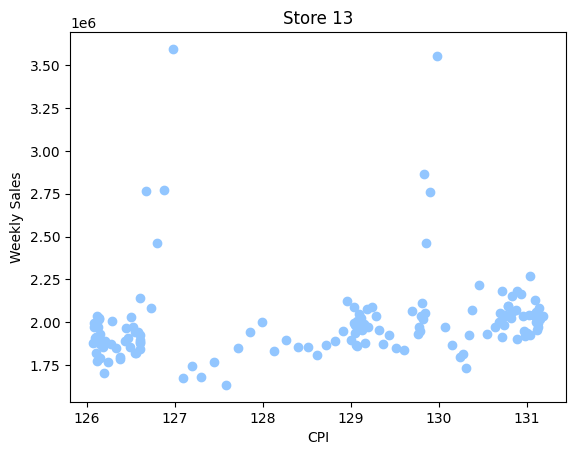

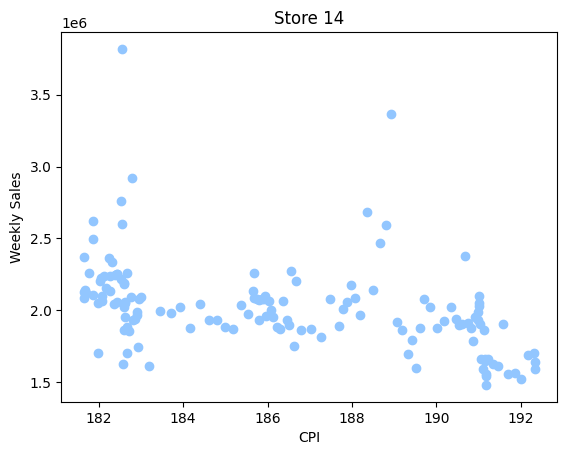

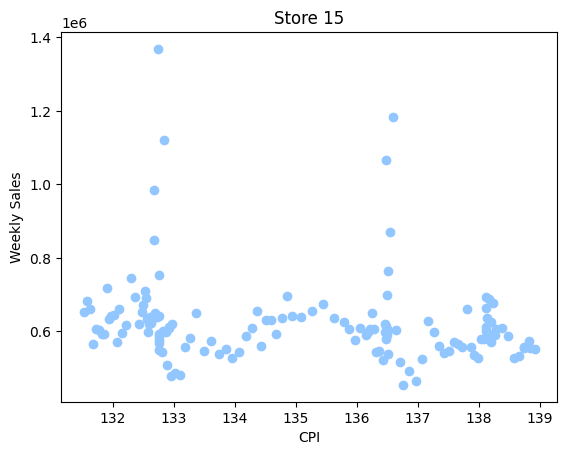

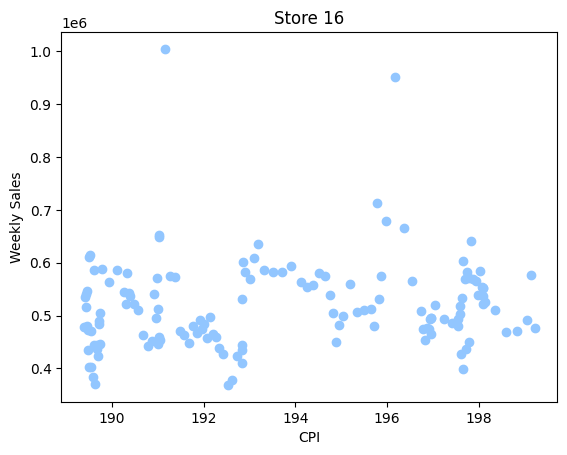

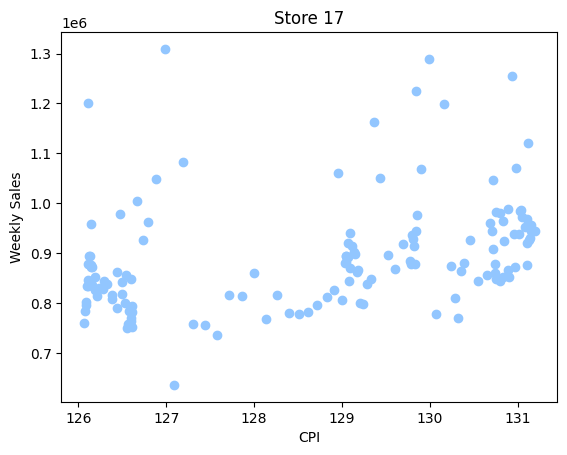

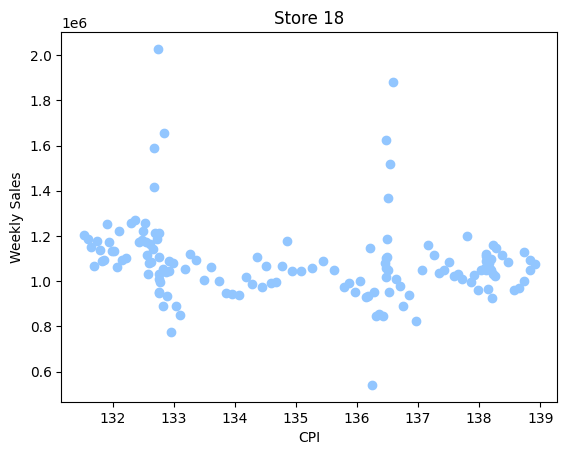

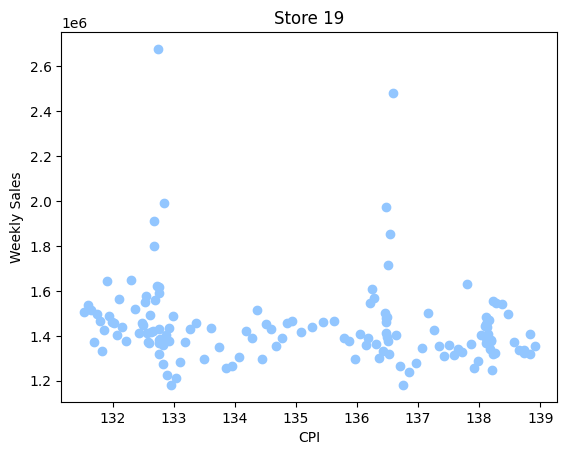

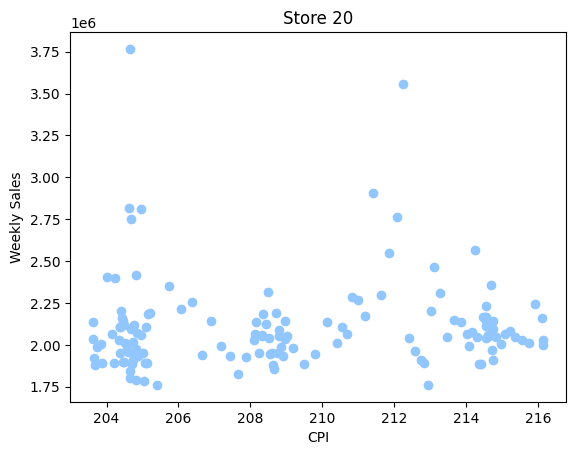

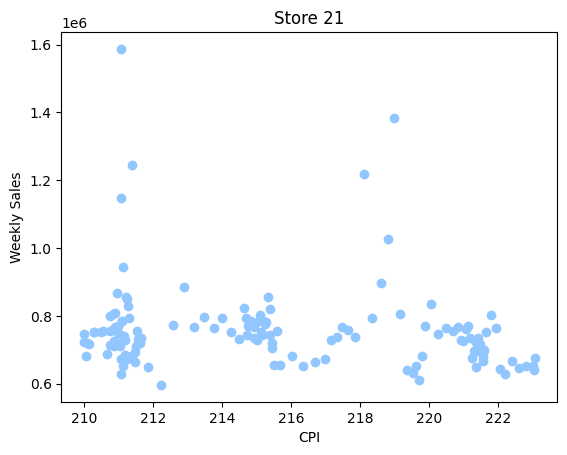

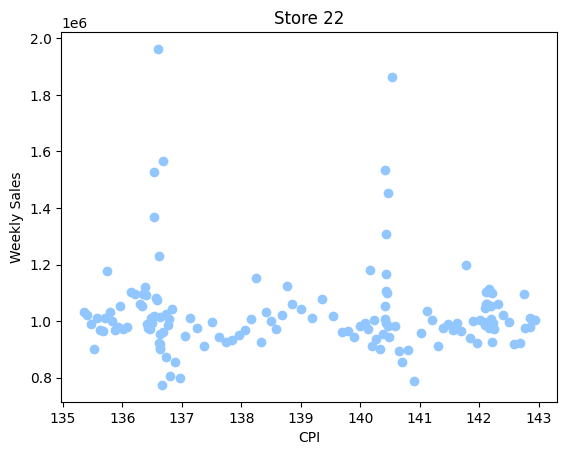

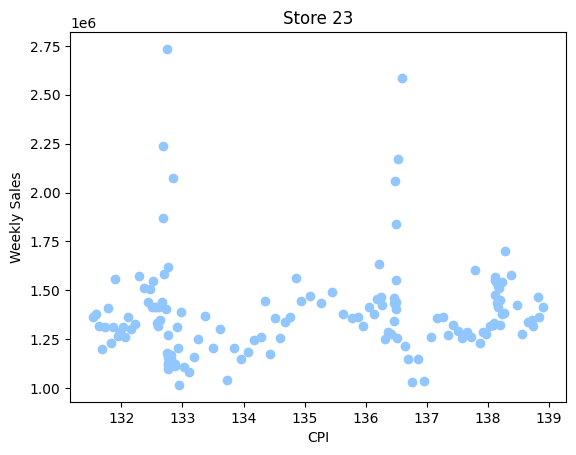

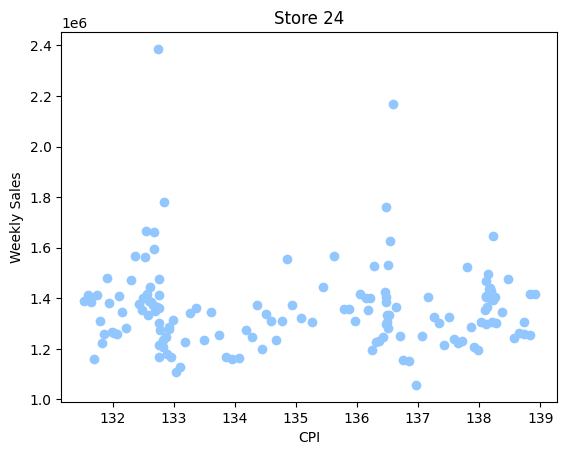

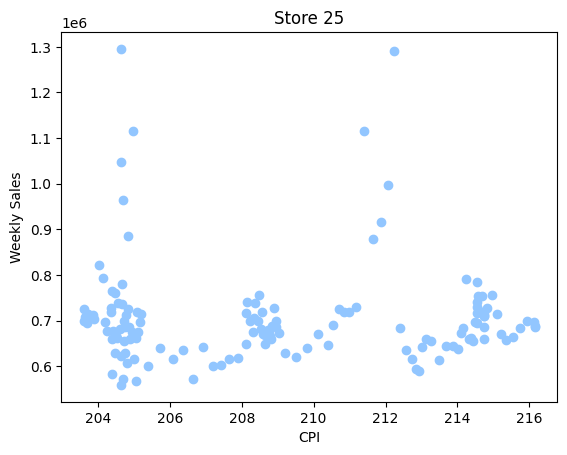

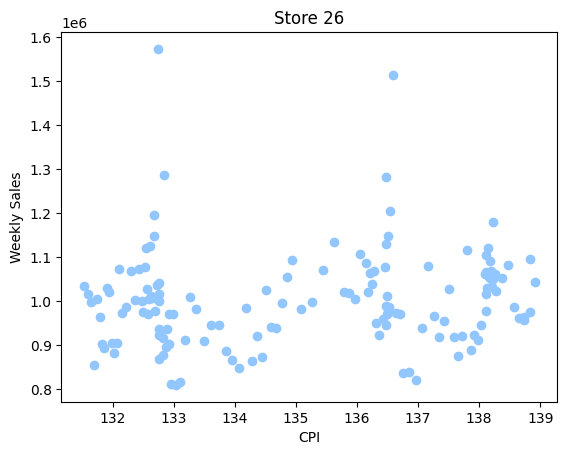

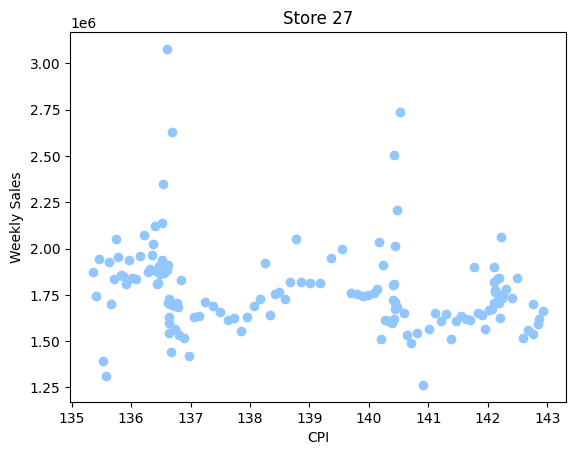

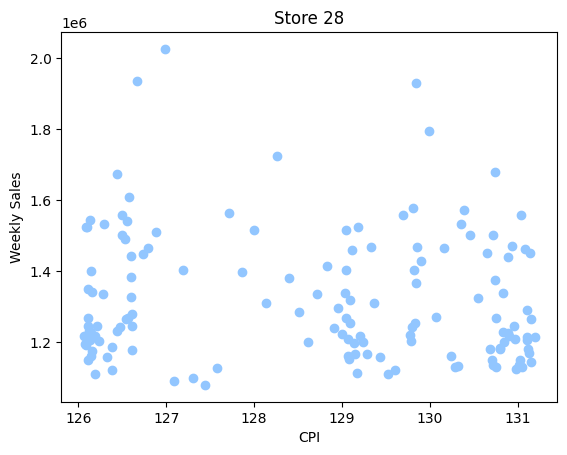

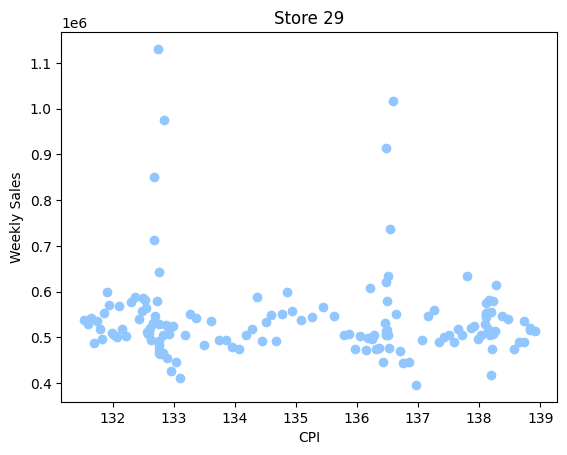

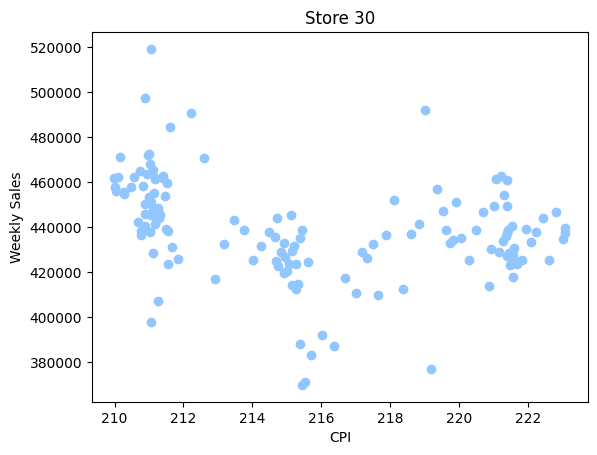

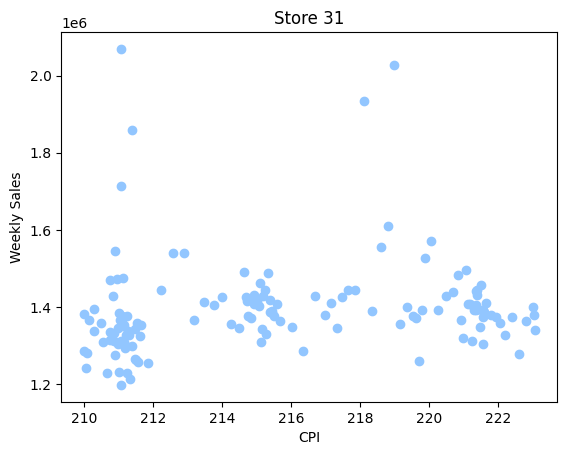

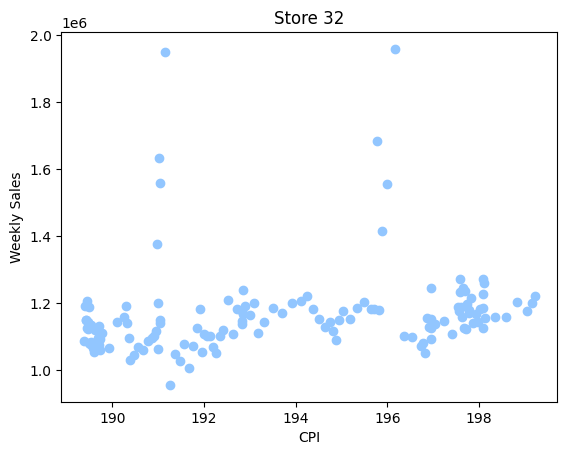

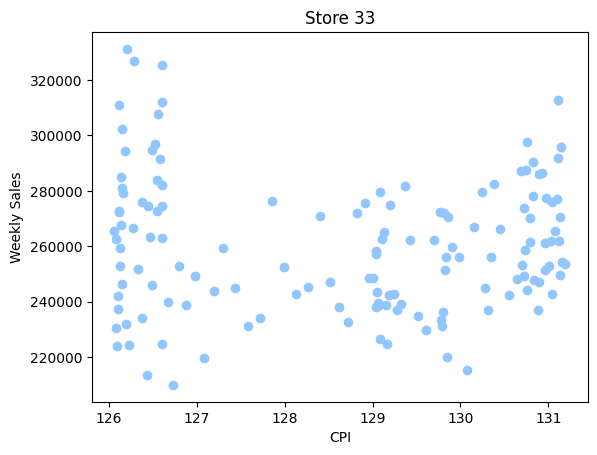

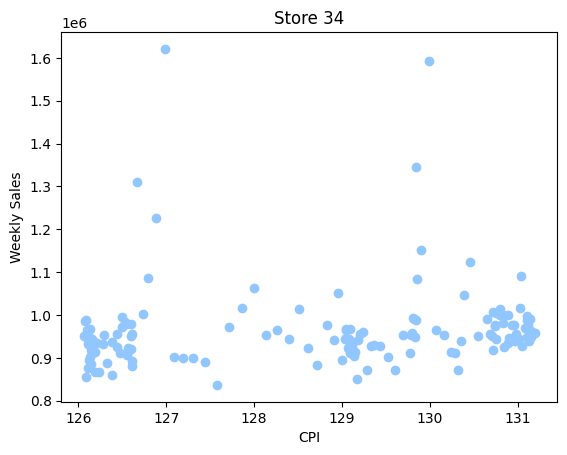

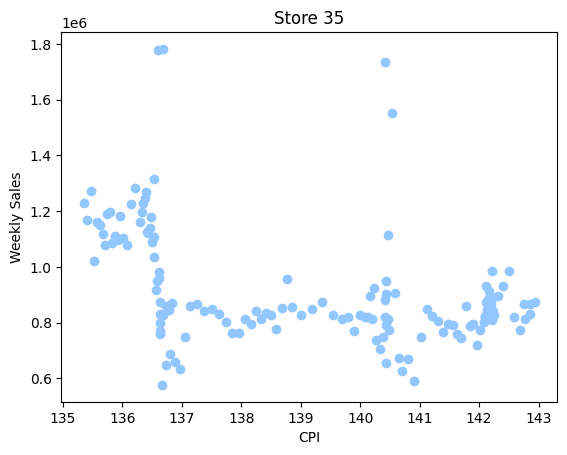

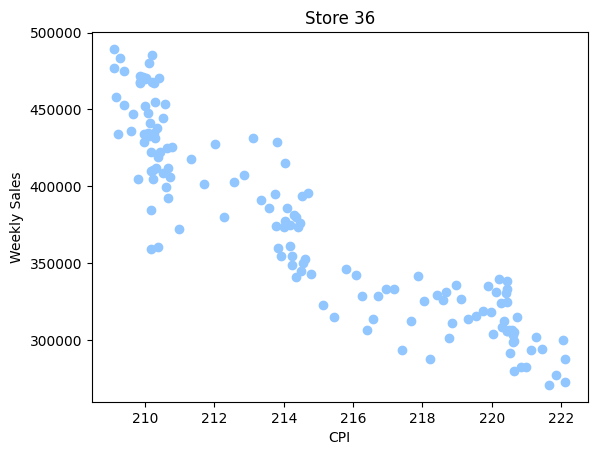

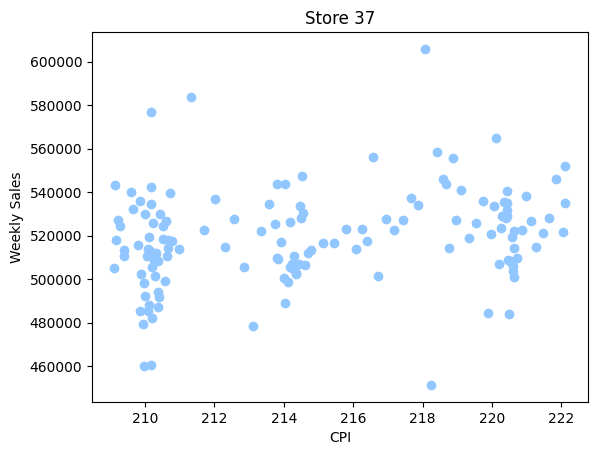

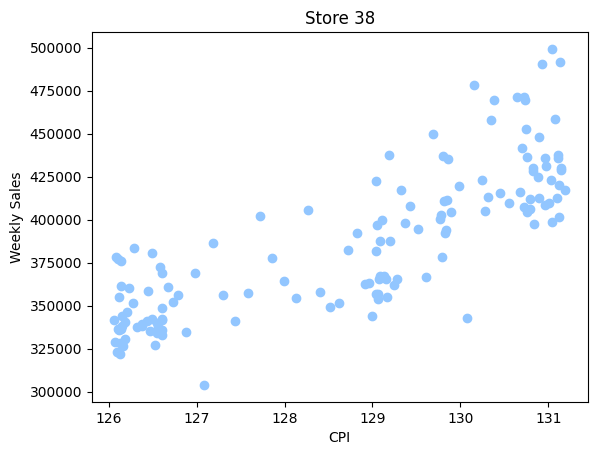

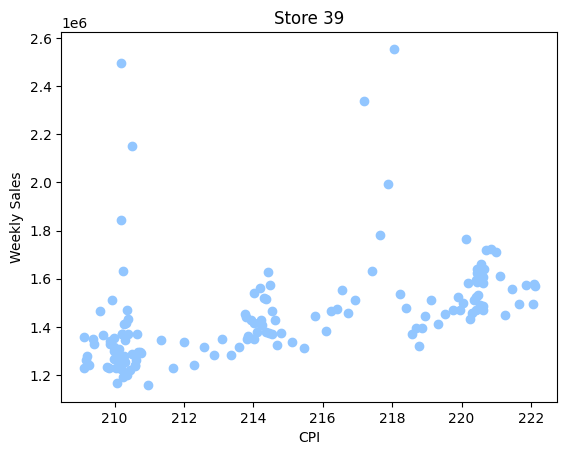

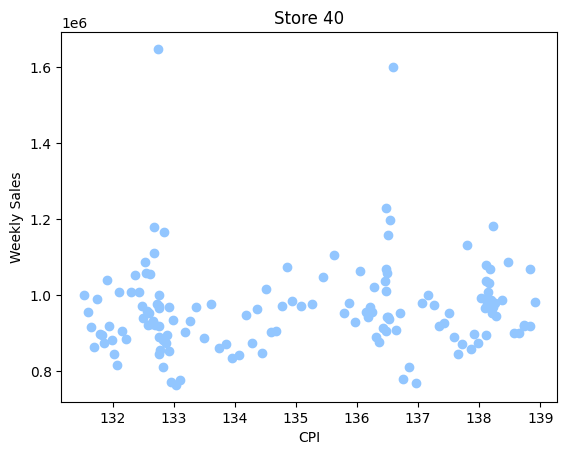

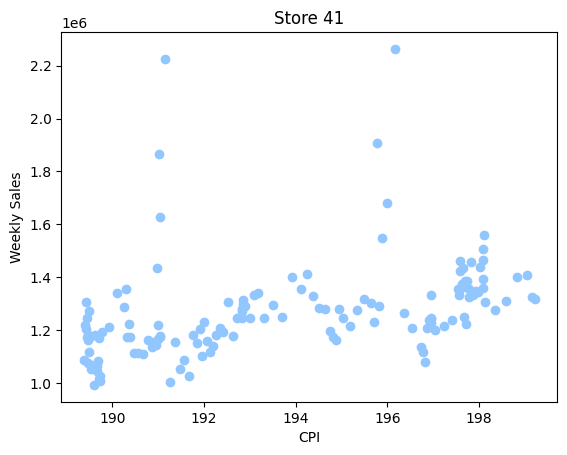

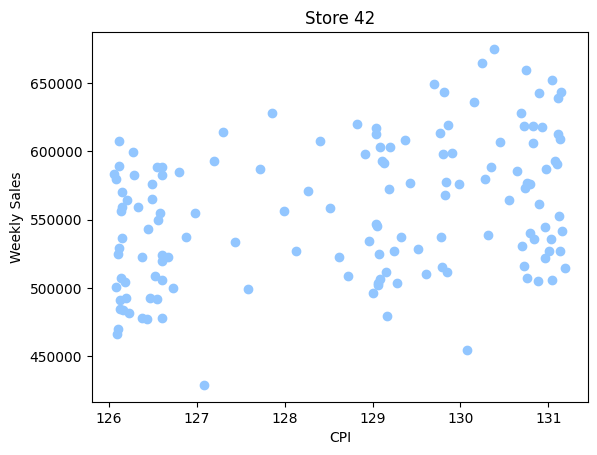

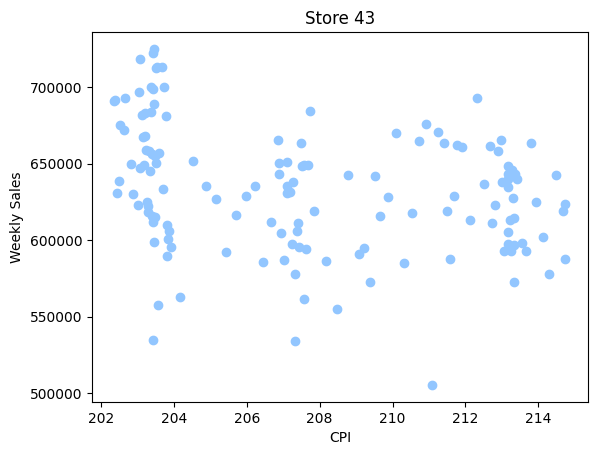

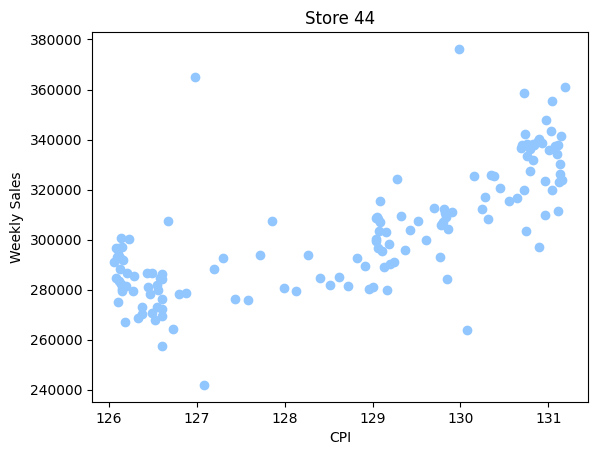

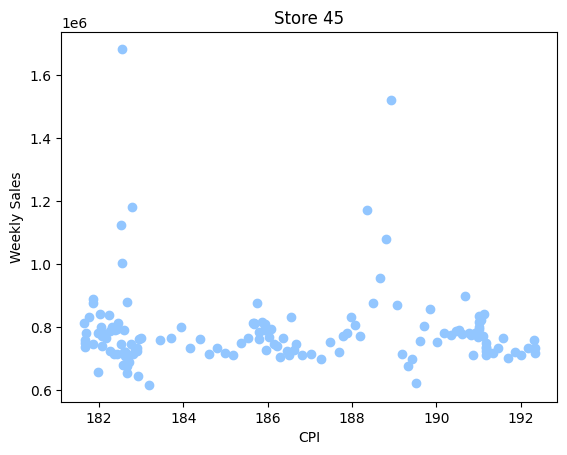

In [62]:

for i in range(len(store_list)):
    # extract relevant columns
    df = store_list[i][['Weekly_Sales', 'CPI']]
    
    # create new figure and subplot
    fig, ax = plt.subplots()
    
    # plot scatter plot
    ax.scatter(df['CPI'], df['Weekly_Sales'])
    
    # set title and axis labels
    ax.set_title(f"Store {i+1}")
    ax.set_xlabel('CPI')
    ax.set_ylabel('Weekly Sales')
    
    # display plot
    plt.show()


# e. Top performing stores according to the historical data.


In [63]:
total_sales = {}
for i in range(len(store_list)):
    sales = store_list[i]["Weekly_Sales"].sum()
    total_sales["Store{}".format(i+1)] = sales
    sorted_sale = sorted(total_sales.items(), key = lambda x : x[1] ,reverse = True)
for i in range(10):
    print("{}: {:.2f}".format(sorted_sale[i][0], sorted_sale[i][1]))

Store20: 301397792.46
Store4: 299543953.38
Store14: 288999911.34
Store13: 286517703.80
Store2: 275382440.98
Store10: 271617713.89
Store27: 253855916.88
Store6: 223756130.64
Store1: 222402808.85
Store39: 207445542.47


# The worst performing store, and how significant is the difference between the


In [64]:
from operator import itemgetter

min(total_sales.items(), key=itemgetter(1))

print(f"Difference between Worst and Best Store: {301397792.46 - 37160221.95}$")

Difference between Worst and Best Store: 264237570.51$


# Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks.

In [65]:
for i in range(len(store_list)):
    store_list[i] = store_list[i]["Weekly_Sales"] 
    


In [66]:
store_list[0]

store_list[0] = store_list[0].apply(lambda x : np.log(x))


In [67]:
store_list[0] = store_list[0] - store_list[0].shift()

In [68]:
store_list[0] = store_list[0].ewm(alpha = 0.1, adjust = False).mean()

In [69]:
store_list[0] = store_list[0].diff(periods=3)



In [70]:
store_list[0].dropna(inplace=True)

<Figure size 640x480 with 0 Axes>

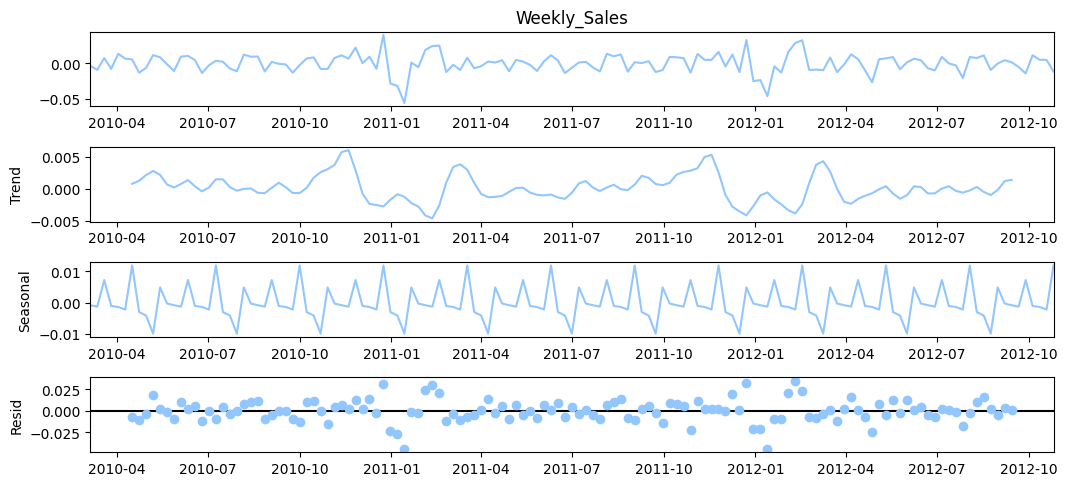

In [71]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(store_list[0], period=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(12, 5)
plt.show()

In [72]:
series = store_list[0]
from statsmodels.tsa.stattools import adfuller
result = adfuller(series, autolag='AIC')
# Extracting the values from the results:

print('ADF Statistic: %f' % result[0])

print('p-value: %f' % result[1])

print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -5.508713
p-value: 0.000002
Critical Values:
	1%: -3.484
	5%: -2.885
	10%: -2.579
Reject Ho - Time Series is Stationary


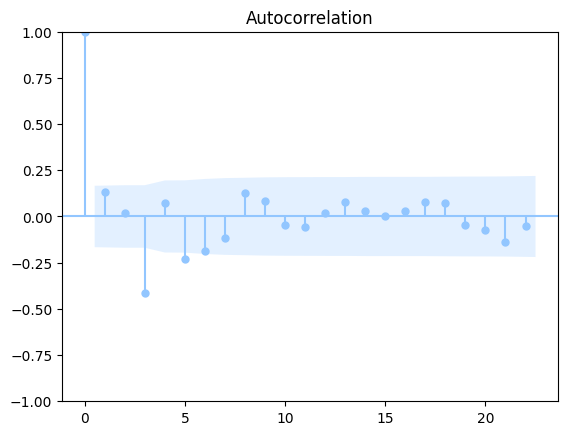

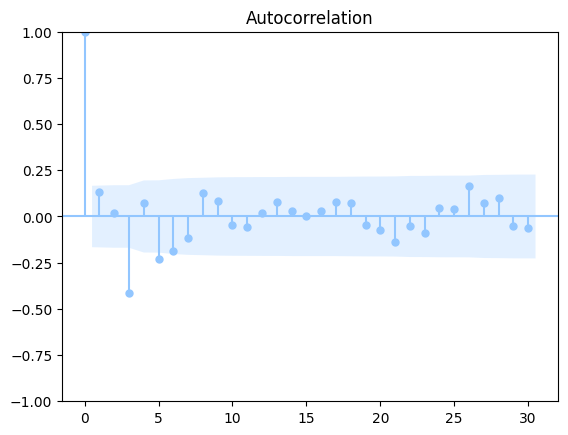

In [73]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(store_list[0])
plt.show()
plot_acf(store_list[0], lags = 30)
plt.show()


In [74]:
store_list[0]

Date
2010-03-05   -0.003477
2010-03-12   -0.008989
2010-03-19    0.007581
2010-03-26   -0.007707
2010-04-02    0.013489
                ...   
2012-09-28   -0.014105
2012-10-05    0.011462
2012-10-12    0.005037
2012-10-19    0.005007
2012-10-26   -0.011523
Name: Weekly_Sales, Length: 139, dtype: float64

In [76]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(store_list[0],
                                order=(4, 4, 3),
                                seasonal_order=(1, 1, 0, 52),
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

C:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3568      0.165     -8.215      0.000      -1.680      -1.033
ar.L2         -1.1489      0.183     -6.280      0.000      -1.507      -0.790
ar.L3         -1.1842      0.140     -8.441      0.000      -1.459      -0.909
ar.L4         -0.6773      0.086     -7.895      0.000      -0.845      -0.509
ma.L1         -1.1155      0.480     -2.323      0.020      -2.057      -0.175
ma.L2         -0.1425      0.361     -0.394      0.694      -0.851       0.566
ma.L3          0.2695      0.209      1.287      0.198      -0.141       0.680
ar.S.L52      -0.3753      0.181     -2.074      0.038      -0.730      -0.021
sigma2      7.222e-05   3.51e-05      2.058      0.040    3.44e-06       0.000


C:\Users\asus\AppData\Local\Temp\ipykernel_22152\3809637464.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


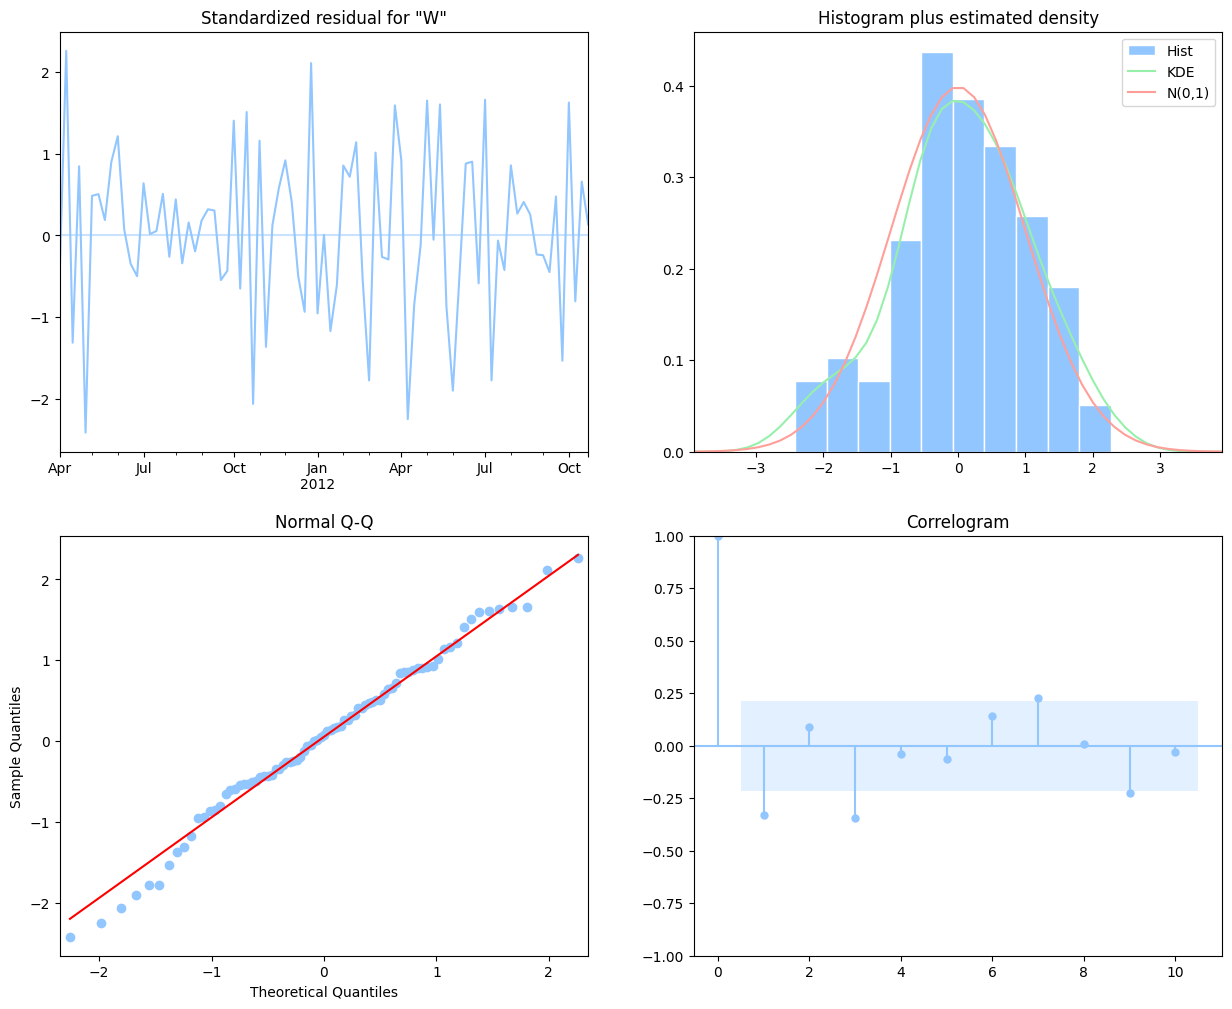

In [32]:
plt.style.use('seaborn-pastel')
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [33]:
forecast = (results.forecast(steps=12))

# Print the forecasted values
print(forecast)

2012-11-02    0.010358
2012-11-09    0.010518
2012-11-16    0.007232
2012-11-23    0.025096
2012-11-30    0.000142
2012-12-07    0.019160
2012-12-14   -0.002685
2012-12-21    0.046850
2012-12-28   -0.014125
2013-01-04   -0.013272
2013-01-11   -0.032611
2013-01-18    0.015933
Freq: W-FRI, Name: predicted_mean, dtype: float64


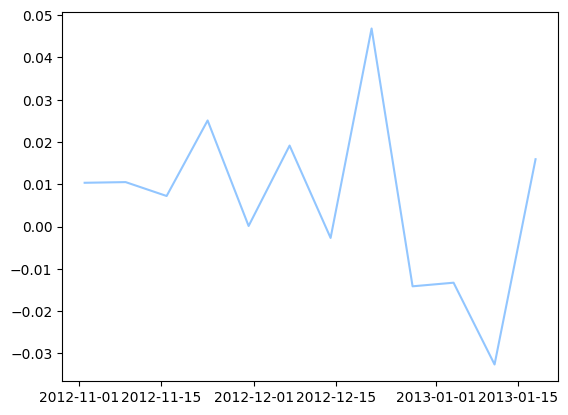

In [34]:
plt.plot(forecast)

In [35]:
store_list[0]

Date
2010-03-05   -0.003477
2010-03-12   -0.008989
2010-03-19    0.007581
2010-03-26   -0.007707
2010-04-02    0.013489
                ...   
2012-09-28   -0.014105
2012-10-05    0.011462
2012-10-12    0.005037
2012-10-19    0.005007
2012-10-26   -0.011523
Name: Weekly_Sales, Length: 139, dtype: float64

In [36]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2012-7-27'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

In [37]:
import numpy as np
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
print(y_forecasted)

2012-07-27   -0.016713
2012-08-03    0.007210
2012-08-10    0.001988
2012-08-17   -0.002203
2012-08-24   -0.027785
2012-08-31   -0.024887
2012-09-07   -0.028544
2012-09-14   -0.037177
2012-09-21   -0.057445
2012-09-28   -0.063114
2012-10-05   -0.057968
2012-10-12   -0.067709
2012-10-19   -0.087859
2012-10-26   -0.113186
Freq: W-FRI, Name: predicted_mean, dtype: float64


In [38]:
y_truth = store_list[0]['2012-7-27':]

print(y_truth)

Date
2012-07-27   -0.020343
2012-08-03    0.008974
2012-08-10    0.007595
2012-08-17    0.011184
2012-08-24   -0.009171
2012-08-31   -0.000131
2012-09-07    0.004454
2012-09-14    0.001635
2012-09-21   -0.004996
2012-09-28   -0.014105
2012-10-05    0.011462
2012-10-12    0.005037
2012-10-19    0.005007
2012-10-26   -0.011523
Name: Weekly_Sales, dtype: float64


In [39]:
# Compute the Root mean square error
rmse = np.sqrt(((y_forecasted - y_truth) ** 2).mean())
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))

The Root Mean Squared Error of our forecasts is 0.05


In [40]:
# Get forecast 12 weeks ahead in future
pred_uc = results.get_forecast(steps=12)

print(pred_uc)

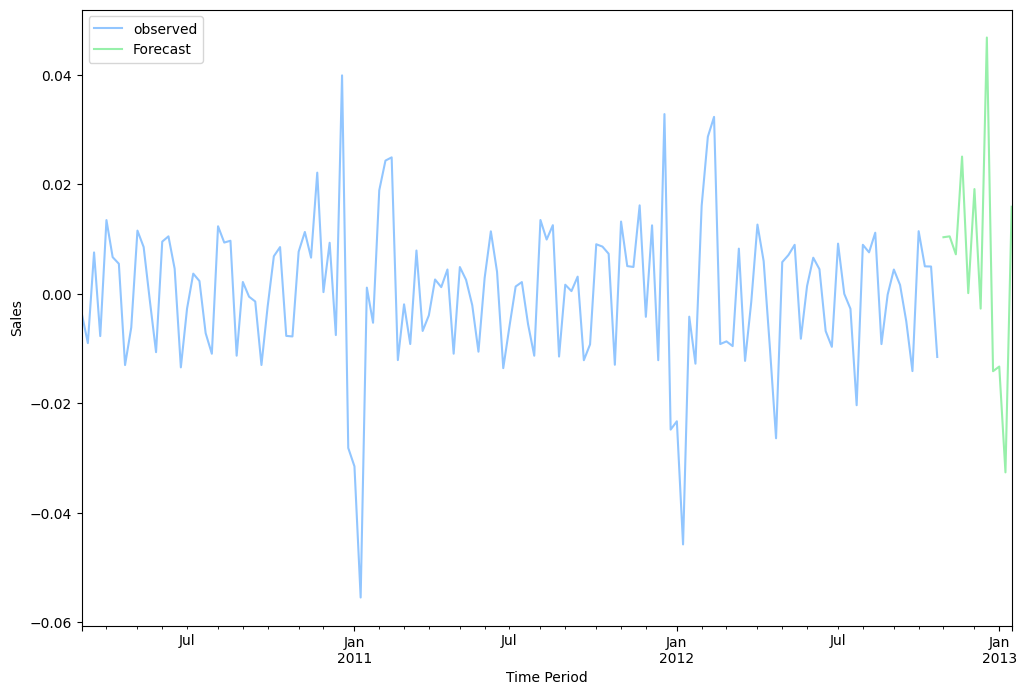

In [81]:


ax = store_list[0].plot(label='observed', figsize=(12, 8))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')

ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')

plt.legend()
plt.show()



Residual for Store1 0.5777295332336122
